## $\beta$ scaling studies

In [1]:
# Add locations of modules
push!(LOAD_PATH, "../../src/")

4-element Array{String,1}:
 "@"         
 "@v#.#"     
 "@stdlib"   
 "../../src/"

In [2]:
# For figures
using PyCall
#PyDict(pyimport("matplotlib")["rcParams"])["font.sans-serif"] = "Helvetica"
PyDict(pyimport("matplotlib")["rcParams"])["font.sans-serif"] = "Avant Garde"
using PyPlot
rc("font", family="sans-serif")

PyPlot.svg(true)

┌ Info: Recompiling stale cache file /Users/arkopal/.julia/compiled/v1.0/PyCall/GkzkC.ji for PyCall [438e738f-606a-5dbb-bf0a-cddfbfd45ab0]
└ @ Base loading.jl:1190


PyCall.PyError: PyError (PyImport_ImportModule

The Python package matplotlib could not be found by pyimport. Usually this means
that you did not install matplotlib in the Python version being used by PyCall.

PyCall is currently configured to use the Julia-specific Python distribution
installed by the Conda.jl package.  To install the matplotlib module, you can
use `pyimport_conda("matplotlib", PKG)`, where PKG is the Anaconda
package the contains the module matplotlib, or alternatively you can use the
Conda package directly (via `using Conda` followed by `Conda.add` etcetera).

Alternatively, if you want to use a different Python distribution on your
system, such as a system-wide Python (as opposed to the Julia-specific Python),
you can re-configure PyCall with that Python.   As explained in the PyCall
documentation, set ENV["PYTHON"] to the path/name of the python executable
you want to use, run Pkg.build("PyCall"), and re-launch Julia.

) <class 'ModuleNotFoundError'>
ModuleNotFoundError("No module named 'matplotlib'")


In [3]:
# Define coloring
# Tableau 20 Colors
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),  
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),  
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),  
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),  
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229), (237,102,90)]
             
# Tableau Color Blind 10
tableau20blind = [(0, 107, 164), (255, 128, 14), (171, 171, 171), (89, 89, 89),
             (95, 158, 209), (200, 82, 0), (137, 137, 137), (163, 200, 236),
             (255, 188, 121), (207, 207, 207)]
  
# Rescale to values between 0 and 1
tableau20_r = Array{Tuple{Float64,Float64,Float64},1}(length(tableau20))
tableau20blind_r = Array{Tuple{Float64,Float64,Float64},1}(length(tableau20blind))

for i=1:length(tableau20)  
    r, g, b = tableau20[i]  
    tableau20_r[i] = (r / 255., g / 255., b / 255.)
end
for i=1:length(tableau20blind)  
    r, g, b = tableau20blind[i]  
    tableau20blind_r[i] = (r / 255., g / 255., b / 255.)
end

# Copied from https://gist.github.com/AndiH/c957b4d769e628f506bd 
# From http://tableaufriction.blogspot.ro/2012/11/finally-you-can-use-tableau-data-colors.html
# With code from http://www.randalolson.com/2014/06/28/how-to-make-beautiful-data-visualizations-in-python-with-matplotlib/

In [4]:
function solve_exp_system(β_array::Array,M_array::Array,d_max::Integer)
    # Set up the least squares problem
    b = log.(M_array)
    A = ones(length(β_array),2)
    for i=1:length(β_array)
        A[i,2] = β_array[i]*d_max
    end
    x = A\b
    return x
end

solve_exp_system (generic function with 1 method)

In [5]:
function solve_log_system(β_array::Array,M_array::Array,d_max::Integer)
    # Set up the least squares problem
    b = log.(M_array)
    A = ones(length(β_array),2)
    for i=1:length(β_array)
        A[i,2] = log(β_array[i])
    end
    x = A\b
    return x
end

solve_log_system (generic function with 1 method)

In [6]:
#using GraphicalModelLearning
using LightGraphs
#using Cairo
#using Junet
using LaTeXStrings

#include("beta_scaling.jl")

In [7]:
function plot_trends_RISE_RPLE(β_array, M_array, β_array_RPLE, M_array_RPLE, d_max, 
        ind_start_RISE, ind_start_RPLE, ind_end_RISE, ind_end_RPLE,
        xticks_array, yticks_array, savefile_fig, format_fig, FLAG_save)
    
    # Solve for the slopes
    x = solve_exp_system(β_array[ind_start_RISE:end-ind_end_RISE], 
                        M_array[ind_start_RISE:end-ind_end_RISE],d_max)
    x_RPLE = solve_exp_system(β_array_RPLE[ind_start_RPLE:end-ind_end_RPLE], 
                        M_array_RPLE[ind_start_RPLE:end-ind_end_RPLE], d_max)

    c1 = "#911eb4" #Purple
    c2 = "#3cb44b" #Green

    figure(figsize=(7.5,4.5))
    ax=subplot(111)
    ax[:spines]["top"][:set_color]("none") # Remove the top axis boundary
    ax[:spines]["right"][:set_color]("none") # Remove the right axis boundary    


    # Curve Fit
    semilogy(β_array[ind_start_RISE:end],exp(x[1])*exp.(x[2]*β_array[ind_start_RISE:end]*d_max),linestyle="--",c=c1,linewidth=2,label=latexstring("\$\\exp(",string(round(x[2],2)),"\\beta d)\$"),zorder=1)
    semilogy(β_array_RPLE[ind_start_RPLE:end],exp(x_RPLE[1])*exp.(x_RPLE[2]*β_array_RPLE[ind_start_RPLE:end]*d_max),linestyle="--",c=c2,linewidth=2,label=latexstring("\$\\exp(",string(round(x_RPLE[2],2)),"\\beta d)\$"),zorder=1)

    # Data
    scatter(β_array,M_array,s=30,color=c1,marker="s",edgecolor="k",linewidth=0.5, zorder=2, label="GD-RISE")
    scatter(β_array_RPLE,M_array_RPLE,s=30,color=c2,marker="o",edgecolor="k",linewidth=0.5, zorder=2, label="GD-RPLE")

    xlabel(L"\beta",fontsize=16)
    ylabel(L"m^{\star}",fontsize=16)
    legend(fontsize=14, frameon=false)
    xticks(xticks_array,fontsize=14)
    yticks(yticks_array, fontsize=14)
    #grid("on",linestyle="dotted")
    
    if FLAG_save
        savefig(savefile_fig, format=format_fig, dpi=300,bbox_inches="tight")
    end
end

plot_trends_RISE_RPLE (generic function with 1 method)

## Small System

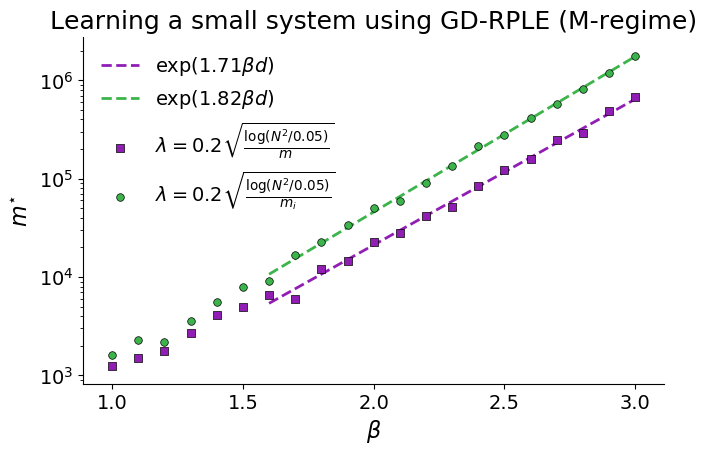

/Users/gogol/.julia/v0.6/Conda/deps/usr/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


In [8]:
β_array = [1.0 + 0.1*i for i=0:20]
M_array = [1250, 1500, 1750, 2700, 4100, 5000, 6600, 6000, 11950, 14600, 22650, 27800, 41500, 
    51250, 84750, 121350, 157750, 249550, 294750, 489550, 669450]
M_array_reg = [1600, 2300, 2200, 3600, 5550, 7950, 9100, 16850, 22700, 34000, 50800, 59750, 89700, 134950,
    213350, 277800, 418700, 572600, 822200, 1180900, 1781000]

yticks_array = 10.^(3:6)
xticks_array = 1.0:0.5:3.0

d_max = 2

x = solve_exp_system(β_array[7:end],M_array[7:end],d_max)
x_reg = solve_exp_system(β_array[7:end],M_array_reg[7:end],d_max)

# See https://sashat.me/2017/01/11/list-of-20-simple-distinct-colors/
c1 = "#911eb4" #Purple
c2 = "#3cb44b" #Green

figure(figsize=(7.5,4.5))
ax=subplot(111)
ax[:spines]["top"][:set_color]("none") # Remove the top axis boundary
ax[:spines]["right"][:set_color]("none") # Remove the right axis boundary    

# Curve Fit
semilogy(β_array[7:end],exp(x[1])*exp.(x[2]*β_array[7:end]*d_max),linestyle="--",c=c1,linewidth=2,label=latexstring("\$\\exp(",string(round(x[2],2)),"\\beta d)\$"),zorder=1)
semilogy(β_array[7:end],exp(x_reg[1])*exp.(x_reg[2]*β_array[7:end]*d_max),linestyle="--",c=c2,linewidth=2,label=latexstring("\$\\exp(",string(round(x_reg[2],2)),"\\beta d)\$"),zorder=1)

# Data
scatter(β_array,M_array,s=30,color=c1,marker="s",edgecolor="k",linewidth=0.5, zorder=2, label=L"$\lambda = 0.2 \sqrt{\frac{\log(N^2/0.05)}{m}}$")
scatter(β_array,M_array_reg,s=30,color=c2,marker="o",edgecolor="k",linewidth=0.5, zorder=2, label=L"$\lambda = 0.2 \sqrt{\frac{\log(N^2/0.05)}{m_i}}$")

#ax[:set_yscale]("log")
#ax[:set_xscale]("log")

title("Learning a small system using GD-RPLE (M-regime)", fontsize=18)
xlabel(L"\beta",fontsize=16)
ylabel(L"m^{\star}",fontsize=16)
legend(fontsize=14,frameon=false,loc=2)
xticks(xticks_array,fontsize=14)
yticks(yticks_array,fontsize=14)
#grid("on",linestyle="dotted")

savefig("Small_System_RPLE.png", format="png", dpi=300,bbox_inches="tight")

## Star Graph (size=4)

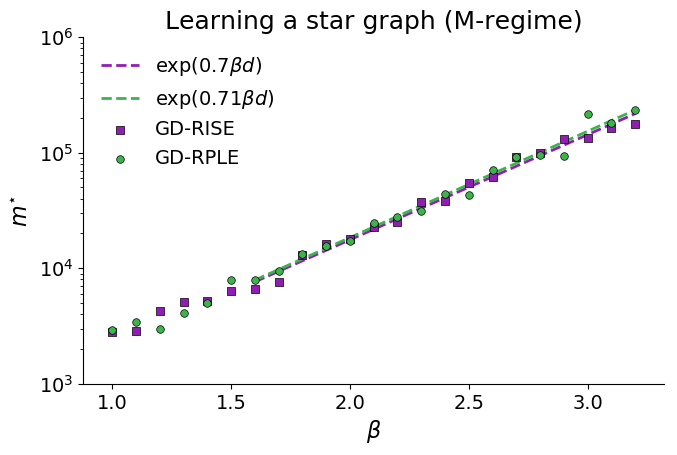

In [12]:
β_array = [1.0 + 0.1*i for i=0:22]
M_array = [2800, 2850, 4300, 5050, 5250, 6300, 6600, 7550, 13100, 16050, 17900, 22600, 25100, 37500, 38200, 
    54450, 61050, 91700, 100300, 130450, 133050, 164900, 176650]

M_array_reg = [2900, 3450, 2950, 4100, 5000, 7900, 7900, 9500, 13300, 15500, 17300, 24850, 27750, 31050, 44300,
    43050, 71000, 92100, 95550, 92850, 216100, 181500, 236350]

yticks_array = 10.^(3:6)
xticks_array = 1.0:0.5:3.0

d_max = 3

x = solve_exp_system(β_array[7:end],M_array[7:end],d_max)
x_reg = solve_exp_system(β_array[7:end],M_array_reg[7:end],d_max)

# See https://sashat.me/2017/01/11/list-of-20-simple-distinct-colors/
c1 = "#911eb4" #Purple
c2 = "#3cb44b" #Green

figure(figsize=(7.5,4.5))
ax=subplot(111)
ax[:spines]["top"][:set_color]("none") # Remove the top axis boundary
ax[:spines]["right"][:set_color]("none") # Remove the right axis boundary    

# Curve Fit
semilogy(β_array[7:end],exp(x[1])*exp.(x[2]*β_array[7:end]*d_max),linestyle="--",c=c1,linewidth=2,label=latexstring("\$\\exp(",string(round(x[2],2)),"\\beta d)\$"),zorder=1)
semilogy(β_array[7:end],exp(x_reg[1])*exp.(x_reg[2]*β_array[7:end]*d_max),linestyle="--",c=c2,linewidth=2,label=latexstring("\$\\exp(",string(round(x_reg[2],2)),"\\beta d)\$"),zorder=1)

# Data
scatter(β_array,M_array,s=30,color=c1,marker="s",edgecolor="k",linewidth=0.5, zorder=2, label="GD-RISE")
scatter(β_array,M_array_reg,s=30,color=c2,marker="o",edgecolor="k",linewidth=0.5, zorder=2, label="GD-RPLE")

#ax[:set_yscale]("log")
#ax[:set_xscale]("log")

title("Learning a star graph (M-regime)", fontsize=18)
xlabel(L"\beta",fontsize=16)
ylabel(L"m^{\star}",fontsize=16)
legend(fontsize=14,frameon=false,loc=2)
xticks(xticks_array,fontsize=14)
yticks(yticks_array,fontsize=14)
#grid("on",linestyle="dotted")

savefig("StarGraph_s4_RISE_RPLE.png", format="png", dpi=300,bbox_inches="tight")

Thought: Is it possible for the scaling to be exponential in beta but somehow not in d?

## Ferro Lattices

### Figure A: Ferromagnetic model on lattice

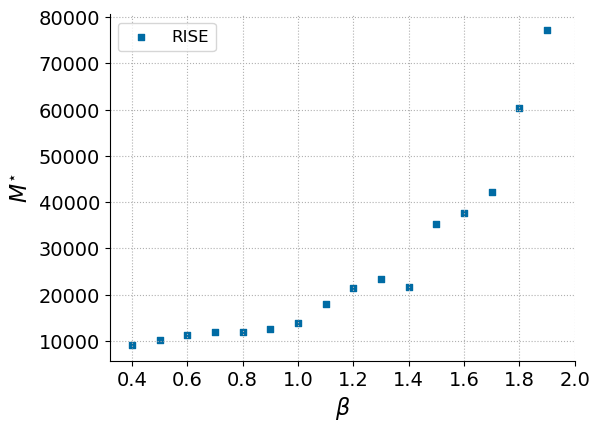

/Users/gogol/.julia/v0.6/Conda/deps/usr/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


In [7]:
β_array = 0.4:0.1:1.9
M_array1 = [9100,10100,11150,11800,11900,12500,13950,17900,21350,23350,21550,35350,37700,42250,60400,77200]
xticks_array = 0.4:0.2:2.0

d_max = 4

figure(figsize=(6,4.5))
ax=subplot(111)
ax[:spines]["top"][:set_color]("none") # Remove the top axis boundary
ax[:spines]["right"][:set_color]("none") # Remove the right axis boundary    
#semilogy(β_array,8500*log(6.5*β_array),"--k",linewidth=2,label="Curve Fit")

scatter(β_array,M_array1,s=20,c=tableau20blind_r[1],marker="s",label="RISE")

xlabel(L"\beta",fontsize=16)
ylabel(L"M^{\star}",fontsize=16)
legend(fontsize=12)
xticks(xticks_array,fontsize=14)
yticks(fontsize=14)
grid("on",linestyle="dotted")
savefig("FigA_M.eps", format="eps", dpi=300)

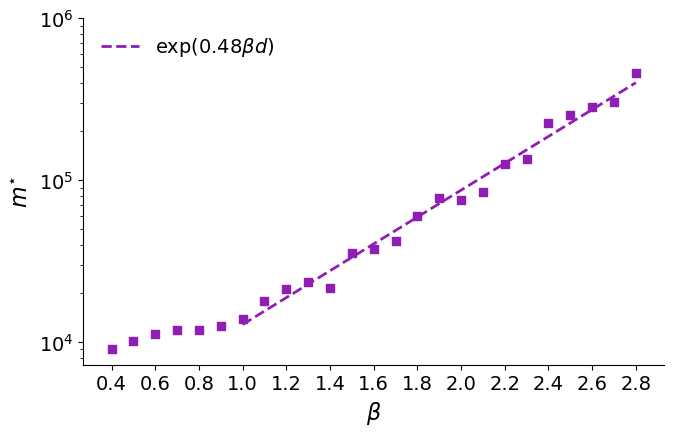

In [20]:
# M-Regime 
β_array = [0.4+0.1*i for i=0:24]
M_array = readdlm("FigA_M_Results.txt")

yticks_array = 10.^(4:6)
xticks_array = 0.4:0.2:2.8

d_max = 4

x = solve_exp_system(β_array[7:end],M_array[7:end],d_max)
#x = solve_log_system(β_array[7:end],M_array[7:end],d_max)

# See https://sashat.me/2017/01/11/list-of-20-simple-distinct-colors/
c1 = "#911eb4" #Purple
c2 = "#3cb44b" #Green

figure(figsize=(7.5,4.5))
ax=subplot(111)
ax[:spines]["top"][:set_color]("none") # Remove the top axis boundary
ax[:spines]["right"][:set_color]("none") # Remove the right axis boundary    

# Curve Fit
#semilogy(β_array[7:end],exp(x[1])*(β_array[7:end].^(x[2])),linestyle="--",c=tableau20_r[1],linewidth=2,label=latexstring("\$\\beta^{",string(round(x[2],2)),"}\$"),zorder=1)
semilogy(β_array[7:end],exp(x[1])*exp.(x[2]*β_array[7:end]*d_max),linestyle="--",c=c1,linewidth=2,label=L"\exp(0.48\beta d)",zorder=1)

# Data
scatter(β_array,M_array,s=30,c=c1,marker="s")

#ax[:set_yscale]("log")
#ax[:set_xscale]("log")

#title("Ferromagnetic Lattice (M-regime)")
xlabel(L"\beta",fontsize=16)
ylabel(L"m^{\star}",fontsize=16)
legend(fontsize=14,frameon=false,loc=2)
xticks(xticks_array,fontsize=14)
yticks(yticks_array,fontsize=14)
#grid("on",linestyle="dotted")

savefig("FigA_ME.svg", format="svg", dpi=300,bbox_inches="tight")

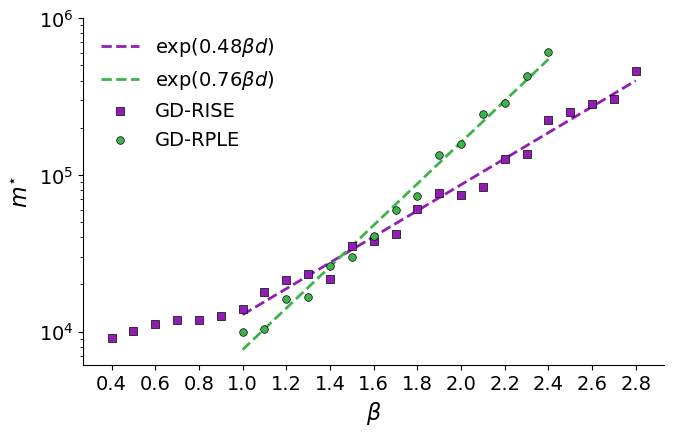

In [33]:
# M-Regime 
β_array = [0.4+0.1*i for i=0:24]
M_array = readdlm("FigA_M_Results.txt")

β_array_RPLE = [1.0 + 0.1*i for i=0:14]
M_array_RPLE = [9900, 10350, 16050, 16600, 26100, 29800, 40850, 59550, 
                73650, 134400, 156950, 245750, 287250, 428500, 609050]

yticks_array = 10.^(4:6)
xticks_array = 0.4:0.2:2.8

d_max = 4

x = solve_exp_system(β_array[7:end],M_array[7:end],d_max)
x_RPLE = solve_exp_system(β_array_RPLE, M_array_RPLE, d_max)

c1 = "#911eb4" #Purple
c2 = "#3cb44b" #Green

figure(figsize=(7.5,4.5))
ax=subplot(111)
ax[:spines]["top"][:set_color]("none") # Remove the top axis boundary
ax[:spines]["right"][:set_color]("none") # Remove the right axis boundary    


# Curve Fit
semilogy(β_array[7:end],exp(x[1])*exp.(x[2]*β_array[7:end]*d_max),linestyle="--",c=c1,linewidth=2,label=latexstring("\$\\exp(",string(round(x[2],2)),"\\beta d)\$"),zorder=1)
semilogy(β_array_RPLE,exp(x_RPLE[1])*exp.(x_RPLE[2]*β_array_RPLE*d_max),linestyle="--",c=c2,linewidth=2,label=latexstring("\$\\exp(",string(round(x_RPLE[2],2)),"\\beta d)\$"),zorder=1)

# Data
scatter(β_array,M_array,s=30,color=c1,marker="s",edgecolor="k",linewidth=0.5, zorder=2, label="GD-RISE")
scatter(β_array_RPLE,M_array_RPLE,s=30,color=c2,marker="o",edgecolor="k",linewidth=0.5, zorder=2, label="GD-RPLE")

xlabel(L"\beta",fontsize=16)
ylabel(L"m^{\star}",fontsize=16)
legend(fontsize=14, frameon=false)
xticks(xticks_array,fontsize=14)
yticks(yticks_array, fontsize=14)
#grid("on",linestyle="dotted")

savefig("FigA_M_RISE_RPLE.svg", format="svg", dpi=300,bbox_inches="tight")

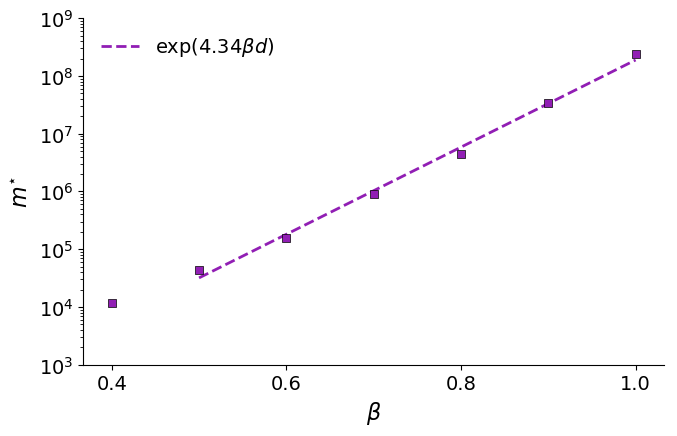

In [25]:
β_array = [0.4+0.1*i for i=0:6]

M_array1 = [37950,178850,892850,4688500]
M_array2 = [11550,43950,154750,890050,4429400,34203650,239576250]

yticks_array = 10.^(3:9)
xticks_array = [0.4+0.2*i for i=0:3]

d_max = 4

x1 = solve_exp_system(β_array[2:5],M_array1,d_max)
x2 = solve_exp_system(β_array[2:7],M_array2[2:7],d_max)

#c1 = tableau20_r[5]
#c2 = tableau20_r[7]

# See https://sashat.me/2017/01/11/list-of-20-simple-distinct-colors/
c1 = "#911eb4" #Purple
c2 = "#3cb44b" #Green

figure(figsize=(7.5,4.5))
ax=subplot(111)
ax[:spines]["top"][:set_color]("none") # Remove the top axis boundary
ax[:spines]["right"][:set_color]("none") # Remove the right axis boundary

# Curve fit to data
#semilogy(β_array[2:8],exp(x1[1])*exp.(x1[2]*β_array[2:8]*d_max),linestyle="--",c=c1,linewidth=2,label=L"\exp(4.01\beta d)",zorder=1)
semilogy(β_array[2:7],exp(x2[1])*exp.(x2[2]*β_array[2:7]*d_max),linestyle="--",c=c1,linewidth=2,label=L"\exp(4.34\beta d)",zorder=1)

# Data
#scatter(β_array[2:5],M_array1,s=40,c=c1,marker="s",edgecolor="k",linewidth=0.5, zorder=2)
scatter(β_array[1:7],M_array2,s=30,c=c1,marker="s",edgecolor="k",linewidth=0.5, zorder=2)

#title("Ferromagnetic Lattice (T-regime)")
xlabel(L"\beta",fontsize=16)
ylabel(L"m^{\star}",fontsize=16)
leg = legend(fontsize=14,frameon=false,loc=2)

xticks(xticks_array,fontsize=14)
yticks(yticks_array,fontsize=14)
#grid("on")
savefig("FigA_T.svg", format="svg", dpi=300, bbox_inches="tight")

In [45]:
ax[:legend].get_texts()

LoadError: [91mtype PyObject has no field get_texts[39m

In [24]:
x2 = solve_exp_system(β_array[1:7],M_array2[1:7],d_max)

2-element Array{Float64,1}:
 2.32652
 4.15072

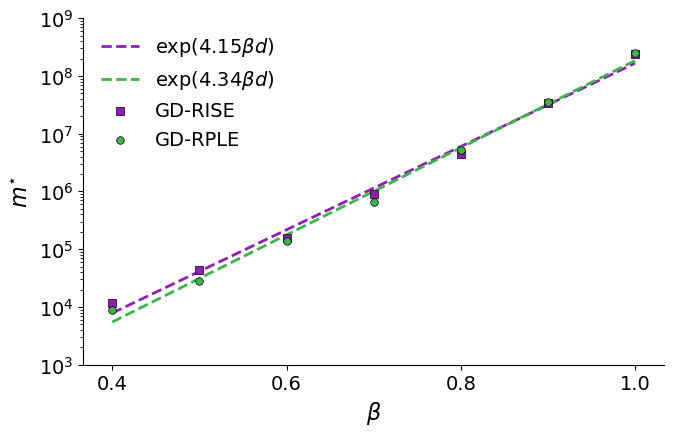

In [32]:
# T-Regime 
β_array = [0.4+0.1*i for i=0:6]
M_array = [11550,43950,154750,890050,4429400,34203650,239576250]

β_array_RPLE = [0.4+0.1*i for i=0:6]
M_array_RPLE = [8850, 28400, 136250, 660000, 5215500, 35197900, 251555050]

yticks_array = 10.^(3:9)
xticks_array = [0.4+0.2*i for i=0:3]

d_max = 4

x = solve_exp_system(β_array,M_array,d_max)
x_RPLE = solve_exp_system(β_array_RPLE, M_array_RPLE, d_max)

c1 = "#911eb4" #Purple
c2 = "#3cb44b" #Green

figure(figsize=(7.5,4.5))
ax=subplot(111)
ax[:spines]["top"][:set_color]("none") # Remove the top axis boundary
ax[:spines]["right"][:set_color]("none") # Remove the right axis boundary    


# Curve Fit
semilogy(β_array,exp(x[1])*exp.(x[2]*β_array*d_max),linestyle="--",c=c1,linewidth=2,label=latexstring("\$\\exp(",string(round(x[2],2)),"\\beta d)\$"),zorder=1)
semilogy(β_array_RPLE,exp(x_RPLE[1])*exp.(x_RPLE[2]*β_array_RPLE*d_max),linestyle="--",c=c2,linewidth=2,label=latexstring("\$\\exp(",string(round(x_RPLE[2],2)),"\\beta d)\$"),zorder=1)

# Data
scatter(β_array,M_array,s=30,color=c1,marker="s",edgecolor="k",linewidth=0.5, zorder=2, label="GD-RISE")
scatter(β_array_RPLE,M_array_RPLE,s=30,color=c2,marker="o",edgecolor="k",linewidth=0.5, zorder=2, label="GD-RPLE")

xlabel(L"\beta",fontsize=16)
ylabel(L"m^{\star}",fontsize=16)
legend(fontsize=14, frameon=false)
xticks(xticks_array,fontsize=14)
yticks(yticks_array, fontsize=14)
#grid("on",linestyle="dotted")

savefig("FigA_T_RISE_RPLE.svg", format="svg", dpi=300,bbox_inches="tight")

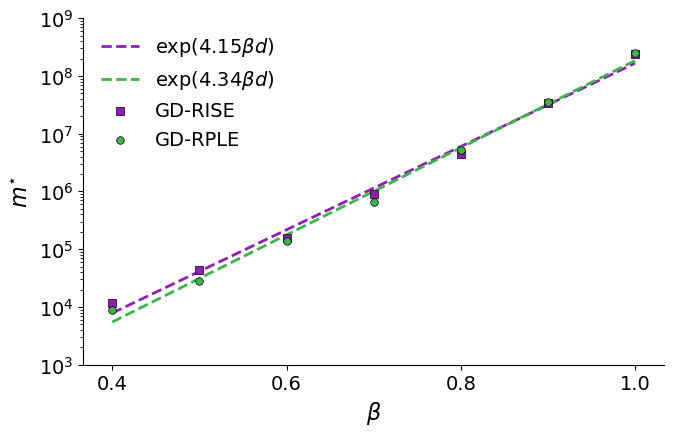

In [54]:
β_array = [0.4+0.1*i for i=0:6]
M_array = [11550,43950,154750,890050,4429400,34203650,239576250]

β_array_RPLE = [0.4+0.1*i for i=0:6]
M_array_RPLE = [8850, 28400, 136250, 660000, 5215500, 35197900, 251555050]

d_max = 4

ind_start_RISE = 1
ind_start_RPLE = 1

yticks_array = 10.^(3:9)
xticks_array = [0.4+0.2*i for i=0:3]

savefile_fig = "FigA_T_RISE_RPLE.svg"
format_fig = "svg"

FLAG_save = true

plot_trends_RISE_RPLE(β_array, M_array, β_array_RPLE, M_array_RPLE, d_max, 
        ind_start_RISE, ind_start_RPLE,
        xticks_array, yticks_array, savefile_fig, format_fig, FLAG_save)

### Figure C: Spin Glass Model

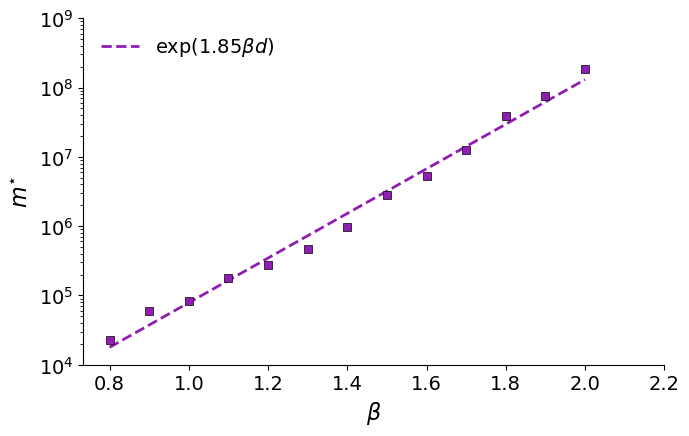

In [29]:
# T-Regime
#β_array1 = [0.8+0.1*i for i=0:13]
#M_array1 = [29850,44550,87550,141800,265850,852350,1762750,2856750,7541200,12221750,30727450,138737850,236091250,364406800]

β_array2 = [0.8+0.1*i for i=0:12]
M_array2 = [22400,58650,82110,178050,274750,467450,966700,2813150,5277750,12637150,38618750,76076450,182162800]

yticks_array = 10.^(4:9)
xticks_array = [0.8+0.2*i for i=0:7]

d_max = 4

#x1 = solve_exp_system(β_array1,M_array1,d_max)
x2 = solve_exp_system(β_array2,M_array2,d_max)

figure(figsize=(7.5,4.5))
ax=subplot(111)
ax[:spines]["top"][:set_color]("none") # Remove the top axis boundary
ax[:spines]["right"][:set_color]("none") # Remove the right axis boundary

# Curve fit to data
#semilogy(β_array1,exp(x1[1])*exp.(x1[2]*β_array1*d_max),linestyle="--",c=tableau20_r[1],linewidth=2,label=L"\exp(1.91\beta d)",zorder=1)
semilogy(β_array2,exp(x2[1])*exp.(x2[2]*β_array2*d_max),linestyle="--",c=c1,linewidth=2,label=L"\exp(1.85\beta d)",zorder=1)

# Data
#scatter(β_array1,M_array1,s=20,c=tableau20_r[1],marker="s",edgecolor="k",linewidth=0.5, zorder=2)
scatter(β_array2,M_array2,s=30,c=c1,marker="s",edgecolor="k",linewidth=0.5, zorder=2)

#title("Ferromagnetic Lattice with Weak Impurty (T-regime)")
xlabel(L"\beta",fontsize=16)
ylabel(L"m^{\star}",fontsize=16)
legend(fontsize=14, frameon=false, loc=2)
xticks(xticks_array,fontsize=14)
yticks(yticks_array,fontsize=14)
#grid("on")
savefig("FigC_T.svg", format="svg", dpi=300)

In [27]:
x1

2-element Array{Float64,1}:
 2.4878 
 4.01442

In [28]:
x2

2-element Array{Float64,1}:
 3.85482
 1.85395

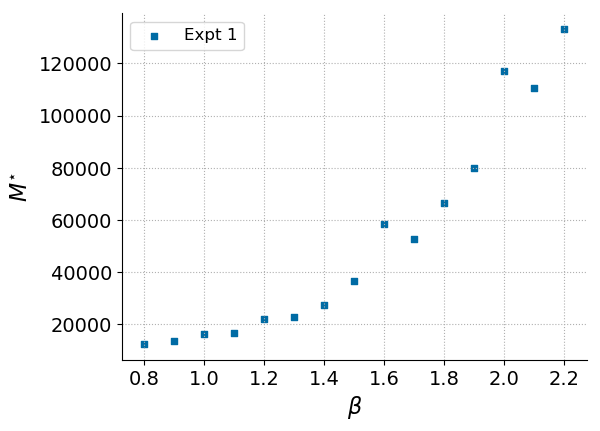

In [9]:
β_array = [0.8+0.1*i for i=0:14]
M_array = [12500,13550,16200,16850,22200,23000,27550,36450,58450,52605,66450,79950,117000,110550,133150]

yticks_array = 10.^(3:9)
xticks_array = [0.8+0.2*i for i=0:7]

d_max = 4

figure(figsize=(6,4.5))
ax=subplot(111)
ax[:spines]["top"][:set_color]("none") # Remove the top axis boundary
ax[:spines]["right"][:set_color]("none") # Remove the right axis boundary    
#semilogy(β_array,8500*log(6.5*β_array),"--k",linewidth=2,label="Curve Fit")
scatter(β_array,M_array,s=20,c=tableau20blind_r[1],marker="s",label="Expt 1")
#title("Spin Glass Model (M-regime)")
xlabel(L"\beta",fontsize=16)
ylabel(L"M^{\star}",fontsize=16)
legend(fontsize=12)
xticks(xticks_array,fontsize=14)
yticks(fontsize=14)
grid("on",linestyle="dotted")
savefig("FigC_M.eps", format="eps", dpi=300,bbox_inches="tight")

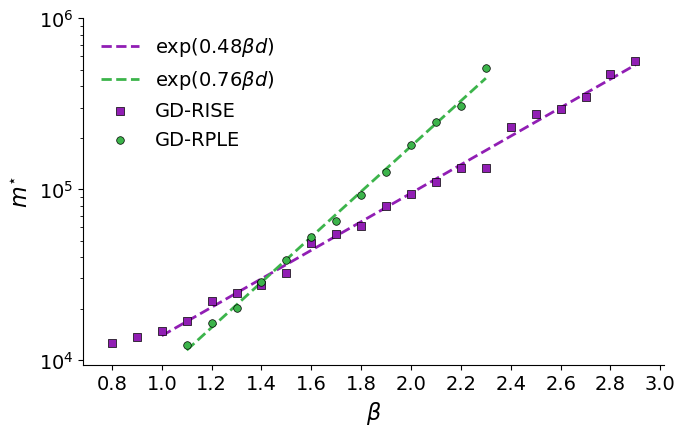

In [34]:
# M-Regime
β_array = [0.8 + 0.1*i for i=0:21]
M_array = readdlm("FigC_M_Results.txt")

β_array_RPLE = [1.0 + 0.1*i for i=1:13]
M_array_RPLE = [12250, 16350, 20050, 28400, 38550, 52400, 64800, 92750, 126550, 181500, 248150, 306200, 508750]

yticks_array = 10.^(4:6)
xticks_array = 0.8:0.2:3.0

d_max = 4

#x = solve_log_system(β_array[3:end],M_array[3:end],d_max)
x = solve_exp_system(β_array[3:end],M_array[3:end],d_max)
x_RPLE = solve_exp_system(β_array_RPLE, M_array_RPLE, d_max)

c1 = "#911eb4" #Purple
c2 = "#3cb44b" #Green

figure(figsize=(7.5,4.5))
ax=subplot(111)
ax[:spines]["top"][:set_color]("none") # Remove the top axis boundary
ax[:spines]["right"][:set_color]("none") # Remove the right axis boundary    

# Curve Fit
semilogy(β_array[3:end],exp(x[1])*exp.(x[2]*β_array[3:end]*d_max),linestyle="--",c=c1,linewidth=2,label=latexstring("\$\\exp(",string(round(x[2],2)),"\\beta d)\$"),zorder=1)
semilogy(β_array_RPLE,exp(x_RPLE[1])*exp.(x_RPLE[2]*β_array_RPLE*d_max),linestyle="--",c=c2,linewidth=2,label=latexstring("\$\\exp(",string(round(x_RPLE[2],2)),"\\beta d)\$"),zorder=1)
#semilogy(β_array[7:end],exp(x[1])*(β_array[7:end].^(x[2])),linestyle="--",c=tableau20_r[1],linewidth=2,label=latexstring("\$\\beta^{",string(round(x[2],2)),"}\$"),zorder=1)

# Data
scatter(β_array,M_array,s=30,color=c1,marker="s",edgecolor="k",linewidth=0.5, zorder=2, label="GD-RISE")
scatter(β_array_RPLE,M_array_RPLE,s=30,color=c2,marker="o",edgecolor="k",linewidth=0.5, zorder=2, label="GD-RPLE")

xlabel(L"\beta",fontsize=16)
ylabel(L"m^{\star}",fontsize=16)
legend(fontsize=14, frameon=false)
xticks(xticks_array,fontsize=14)
yticks(yticks_array, fontsize=14)
#grid("on",linestyle="dotted")

savefig("FigC_M_RISE_RPLE.svg", format="svg", dpi=300,bbox_inches="tight")

#title("Ferromagnetic Lattice with Weak Impurty (M-regime)")
xlabel(L"\beta",fontsize=16)
ylabel(L"m^{\star}",fontsize=16)
legend(fontsize=14,frameon=false,loc=2)
xticks(xticks_array,fontsize=14)
yticks(yticks_array,fontsize=14)
#grid("on",linestyle="dotted")

savefig("FigC_M_RISE_RPLE.svg", format="svg", dpi=300,bbox_inches="tight")

In [31]:
x

2-element Array{Float64,1}:
 7.6145  
 0.480406

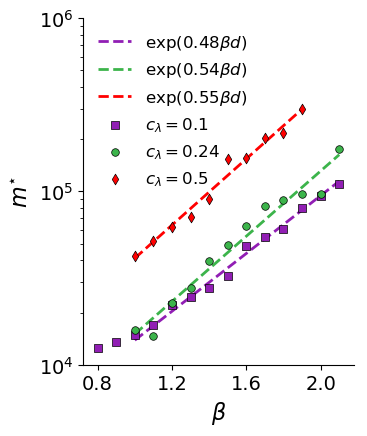

In [77]:
# Different regularizations
# M-Regime
β_array = [0.8 + 0.1*i for i=0:21]
M_array = readdlm("FigC_M_Results.txt")

β_array_RPLE = [1.0 + 0.1*i for i=0:11]
M_array_RPLE = [15850, 14600, 22650, 27800, 39550, 48850, 63400, 82300, 89800, 96150, 97050, 176250]

β_array2 = [1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9]
M_array2 = [42550, 52000, 62000, 71500, 91000, 153100, 156200, 203250, 217750, 297650]

yticks_array = 10.^(4:6)
xticks_array = 0.8:0.4:2.0

d_max = 4

#x = solve_log_system(β_array[3:end],M_array[3:end],d_max)
x = solve_exp_system(β_array[3:end],M_array[3:end],d_max)
x_RPLE = solve_exp_system(β_array_RPLE, M_array_RPLE, d_max)
x2 = solve_exp_system(β_array2, M_array2, d_max)

c1 = "#911eb4" #Purple
c2 = "#3cb44b" #Green

figure(figsize=(3.5,4.5))
ax=subplot(111)
ax[:spines]["top"][:set_color]("none") # Remove the top axis boundary
ax[:spines]["right"][:set_color]("none") # Remove the right axis boundary    

# Curve Fit
semilogy(β_array[3:end-8],exp(x[1])*exp.(x[2]*β_array[3:end-8]*d_max),linestyle="--",c=c1,linewidth=2,label=latexstring("\$\\exp(",string(round(x[2],2)),"\\beta d)\$"),zorder=1)
semilogy(β_array_RPLE,exp(x_RPLE[1])*exp.(x_RPLE[2]*β_array_RPLE*d_max),linestyle="--",c=c2,linewidth=2,label=latexstring("\$\\exp(",string(round(x_RPLE[2],2)),"\\beta d)\$"),zorder=1)
semilogy(β_array2,exp(x2[1])*exp.(x2[2]*β_array2*d_max),linestyle="--",c="r",linewidth=2,label=latexstring("\$\\exp(",string(round(x2[2],2)),"\\beta d)\$"),zorder=1)
#semilogy(β_array[7:end],exp(x[1])*(β_array[7:end].^(x[2])),linestyle="--",c=tableau20_r[1],linewidth=2,label=latexstring("\$\\beta^{",string(round(x[2],2)),"}\$"),zorder=1)

# Data
scatter(β_array[1:end-8],M_array[1:end-8],s=30,color=c1,marker="s",edgecolor="k",linewidth=0.5, zorder=2, label=latexstring("\$c_{\\lambda}=0.1\$"))
scatter(β_array_RPLE,M_array_RPLE,s=30,color=c2,marker="o",edgecolor="k",linewidth=0.5, zorder=2, label=latexstring("\$c_{\\lambda}=0.24\$"))
scatter(β_array2,M_array2,s=30,color="r",marker="d",edgecolor="k",linewidth=0.5, zorder=2, label=latexstring("\$c_{\\lambda}=0.5\$"))

xlabel(L"\beta",fontsize=16)
ylabel(L"m^{\star}",fontsize=16)
legend(fontsize=12, frameon=false)
xticks(xticks_array,fontsize=14)
yticks(yticks_array, fontsize=14)
#grid("on",linestyle="dotted")

savefig("FigC_M_RISE_regularization.png", format="png", dpi=300,bbox_inches="tight")

In [76]:
beta_array2 = [1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9]
M_array2 = [42550, 52000, 62000, 71500, 89000, 153100, 156200, 203250, 217750, 297650]
d_max = 4
x = solve_exp_system(beta_array, M_array, d_max)

LoadError: [91mDimensionMismatch("left hand side has 7 rows, but right hand side has 22 rows")[39m

In [56]:
exp(x[1])*exp.(0.5*1.4*d_max)

66582.97857259391

In [67]:
beta_array = [1.0 + 0.1*i for i=0:6]
M_array = [19150, 22400, 22700, 39300, 51050, 51950, 68250]
d_max = 4
x = solve_exp_system(beta_array, M_array, d_max)

2-element Array{Float64,1}:
 7.54609 
 0.562992

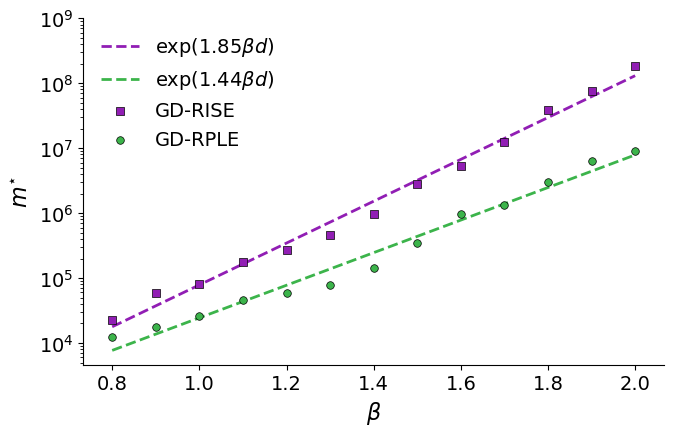

In [35]:
# T-reigme comparison
β_array = [0.8+0.1*i for i=0:12]
M_array = [22400,58650,82110,178050,274750,467450,966700,2813150,5277750,12637150,38618750,76076450,182162800]

β_array_RPLE = [0.8+0.1*i for i=0:12]
M_array_RPLE = [12250, 17500, 26250, 45550, 59215, 76979, 140600, 344250, 976400, 1332750, 2962950, 6236350, 8938200]

d_max = 4

ind_start_RISE = 1
ind_start_RPLE = 1

yticks_array = 10.^(4:9)
xticks_array = [0.8+0.2*i for i=0:6]

savefile_fig = "FigC_T_RISE_RPLE.svg"
format_fig = "svg"

FLAG_save = true

plot_trends_RISE_RPLE(β_array, M_array, β_array_RPLE, M_array_RPLE, d_max, 
        ind_start_RISE, ind_start_RPLE,
        xticks_array, yticks_array, savefile_fig, format_fig, FLAG_save)

### Figure E: Ferromagnetic lattice with weak anti-ferro impurity

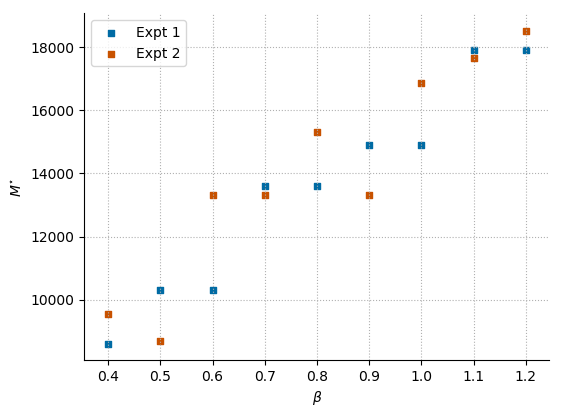

In [21]:
β_array = [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2]
M_array1 = [8600,10300,10300,13600,13600,14900,14900,17900,17900]
M_array2 = [9550,8700,13300,13300,15300,13300,16850,17650,18500]
d_max = 4

figure(figsize=(6,4.5))
ax=subplot(111)
ax[:spines]["top"][:set_color]("none") # Remove the top axis boundary
ax[:spines]["right"][:set_color]("none") # Remove the right axis boundary    
#semilogy(β_array,8500*log(6.5*β_array),"--k",linewidth=2,label="Curve Fit")
scatter(β_array,M_array1,s=20,c=tableau20blind_r[1],marker="s",label="Expt 1")
scatter(β_array,M_array2,s=20,c=tableau20blind_r[6],marker="s",label="Expt 2")
#title("Ferromagnetic Lattice with Weak Impurty (M-regime)")
xlabel(L"\beta")
ylabel(L"M^{\star}")
legend()
xticks(0.4:0.1:1.2)
grid("on",linestyle="dotted")
savefig("FigE_M.eps", format="eps", dpi=300,bbox_inches="tight")

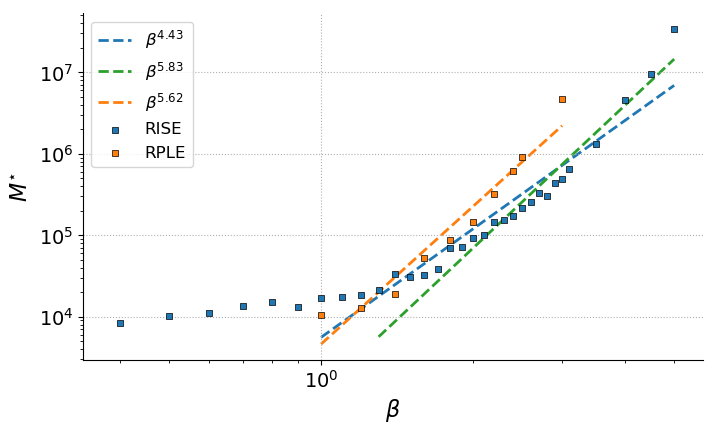

In [10]:
# M-Regime 
β_array = vcat([0.4+0.1*i for i=0:27],[3.5,4.0,4.5,5.0])
M_array = readdlm("FigE_M_Results.txt")

β_array_RPLE = vcat([1.0+0.2*i for i=0:7],[2.5,3.0])
M_array_RPLE = [10500,12800,18900,52700,87250,144400,321000,617550,916400,4678700]

xticks_array = 0.0:0.5:5.0

d_max = 4

x1 = solve_log_system(β_array[7:end],M_array[7:end],d_max)
x2 = solve_log_system(β_array[15:end],M_array[15:end],d_max)
x_RPLE = solve_log_system(β_array_RPLE,M_array_RPLE,d_max)

figure(figsize=(8,4.5))
ax=subplot(111)
ax[:spines]["top"][:set_color]("none") # Remove the top axis boundary
ax[:spines]["right"][:set_color]("none") # Remove the right axis boundary    

# Curve Fit
PyPlot.plot(β_array[7:end],exp(x1[1])*(β_array[7:end].^(x1[2])),linestyle="--",c=tableau20_r[1],linewidth=2,label=latexstring("\$\\beta^{",string(round(x1[2],2)),"}\$"),zorder=1)
PyPlot.plot(β_array[10:end],exp(x2[1])*(β_array[10:end].^(x2[2])),linestyle="--",c=tableau20_r[5],linewidth=2,label=latexstring("\$\\beta^{",string(round(x2[2],2)),"}\$"),zorder=1)
PyPlot.plot(β_array_RPLE,exp(x_RPLE[1])*(β_array_RPLE.^(x_RPLE[2])),linestyle="--",c=tableau20_r[3],linewidth=2,label=latexstring("\$\\beta^{",string(round(x_RPLE[2],2)),"}\$"),zorder=1)

# Data
scatter(β_array,M_array,s=20,color=tableau20_r[1],marker="s",edgecolor="k",linewidth=0.5, label="RISE", zorder=2)
scatter(β_array_RPLE,M_array_RPLE,s=20,color=tableau20_r[3],marker="s",edgecolor="k",linewidth=0.5, label="RPLE", zorder=2)

ax[:set_yscale]("log")
ax[:set_xscale]("log")

#title("Ferromagnetic Lattice with Weak Impurty (M-regime)")
xlabel(L"\beta",fontsize=16)
ylabel(L"M^{\star}",fontsize=16)
legend(fontsize=12)
#xticks(xticks_array,fontsize=14)
yticks(fontsize=14)
xticks(fontsize=14)
grid("on",linestyle="dotted")

#savefig("FigE_M2.eps", format="eps", dpi=300,bbox_inches="tight")

In [15]:
x

2-element Array{Float64,1}:
 9.2163 
 3.31536

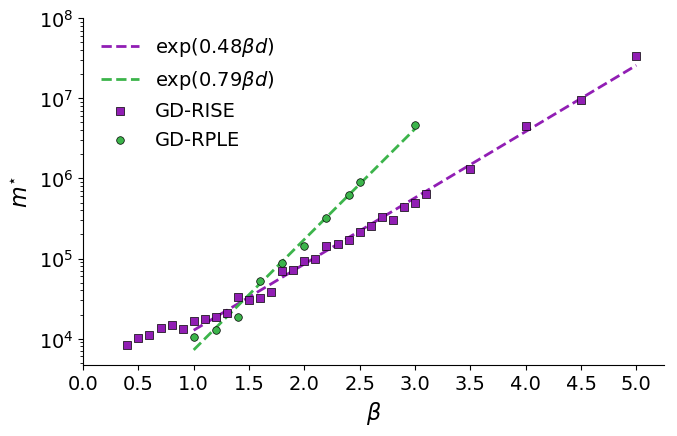

In [10]:
# M-Regime 
β_array = vcat([0.4+0.1*i for i=0:27],[3.5,4.0,4.5,5.0])
M_array = readdlm("FigE_M_Results.txt")

β_array_RPLE = vcat([1.0+0.2*i for i=0:7],[2.5,3.0])
M_array_RPLE = [10500,12800,18900,52700,87250,144400,321000,617550,916400,4678700]

yticks_array = 10.^(4:8)
xticks_array = 0.0:0.5:5.0

d_max = 4

x = solve_exp_system(β_array[7:end], M_array[7:end], d_max)
x_RPLE = solve_exp_system(β_array_RPLE, M_array_RPLE, d_max)

c1 = "#911eb4" #Purple
c2 = "#3cb44b" #Green

figure(figsize=(7.5,4.5))
ax=subplot(111)
ax[:spines]["top"][:set_color]("none") # Remove the top axis boundary
ax[:spines]["right"][:set_color]("none") # Remove the right axis boundary    


# Curve Fit
semilogy(β_array[7:end],exp(x[1])*exp.(x[2]*β_array[7:end]*d_max),linestyle="--",c=c1,linewidth=2,label=latexstring("\$\\exp(",string(round(x[2],2)),"\\beta d)\$"),zorder=1)
semilogy(β_array_RPLE,exp(x_RPLE[1])*exp.(x_RPLE[2]*β_array_RPLE*d_max),linestyle="--",c=c2,linewidth=2,label=latexstring("\$\\exp(",string(round(x_RPLE[2],2)),"\\beta d)\$"),zorder=1)

# Data
scatter(β_array,M_array,s=30,color=c1,marker="s",edgecolor="k",linewidth=0.5, zorder=2, label="GD-RISE")
scatter(β_array_RPLE,M_array_RPLE,s=30,color=c2,marker="o",edgecolor="k",linewidth=0.5, zorder=2, label="GD-RPLE")

xlabel(L"\beta",fontsize=16)
ylabel(L"m^{\star}",fontsize=16)
legend(fontsize=14, frameon=false)
xticks(xticks_array,fontsize=14)
yticks(yticks_array, fontsize=14)
#grid("on",linestyle="dotted")

savefig("FigE_M_RISE_RPLE.svg", format="svg", dpi=300,bbox_inches="tight")

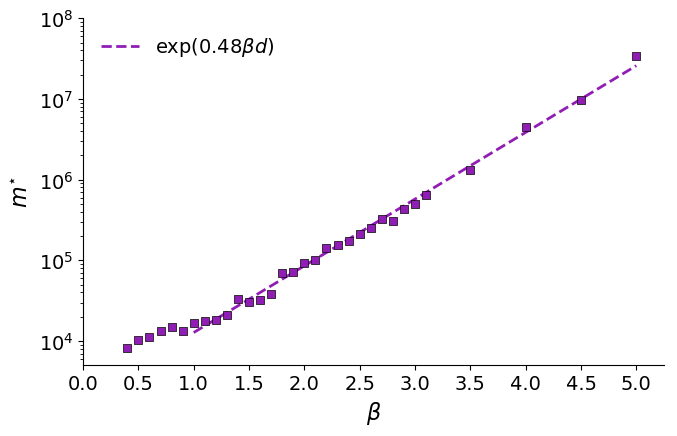

In [33]:
# M-Regime 
β_array = vcat([0.4+0.1*i for i=0:27],[3.5,4.0,4.5,5.0])
M_array = readdlm("FigE_M_Results.txt")

β_array_RPLE = vcat([1.0+0.2*i for i=0:7],[2.5,3.0])
M_array_RPLE = [10500,12800,18900,52700,87250,144400,321000,617550,916400,4678700]

yticks_array = 10.^(4:8)
xticks_array = 0.0:0.5:5.0

d_max = 4

x = solve_exp_system(β_array[7:end], M_array[7:end], d_max)
x_RPLE = solve_exp_system(β_array_RPLE, M_array_RPLE, d_max)

c1 = "#911eb4" #Purple
c2 = "#3cb44b" #Green

figure(figsize=(7.5,4.5))
ax=subplot(111)
ax[:spines]["top"][:set_color]("none") # Remove the top axis boundary
ax[:spines]["right"][:set_color]("none") # Remove the right axis boundary    


# Curve Fit
semilogy(β_array[7:end],exp(x[1])*exp.(x[2]*β_array[7:end]*d_max),linestyle="--",c=c1,linewidth=2,label=latexstring("\$\\exp(",string(round(x[2],2)),"\\beta d)\$"),zorder=1)
#semilogy(β_array_RPLE,exp(x_RPLE[1])*exp.(x_RPLE[2]*β_array_RPLE*d_max),linestyle="--",c=c2,linewidth=2,label=latexstring("\$\\exp(",string(round(x_RPLE[2],2)),"\\beta d)\$"),zorder=1)

# Data
scatter(β_array,M_array,s=30,color=c1,marker="s",edgecolor="k",linewidth=0.5, zorder=2)
#scatter(β_array_RPLE,M_array_RPLE,s=30,color=c2,marker="o",edgecolor="k",linewidth=0.5, zorder=2, label="RPLE")

xlabel(L"\beta",fontsize=16)
ylabel(L"m^{\star}",fontsize=16)
legend(fontsize=14, frameon=false)
xticks(xticks_array,fontsize=14)
yticks(yticks_array, fontsize=14)
#grid("on",linestyle="dotted")

savefig("FigE_M_RISE.svg", format="svg", dpi=300,bbox_inches="tight")

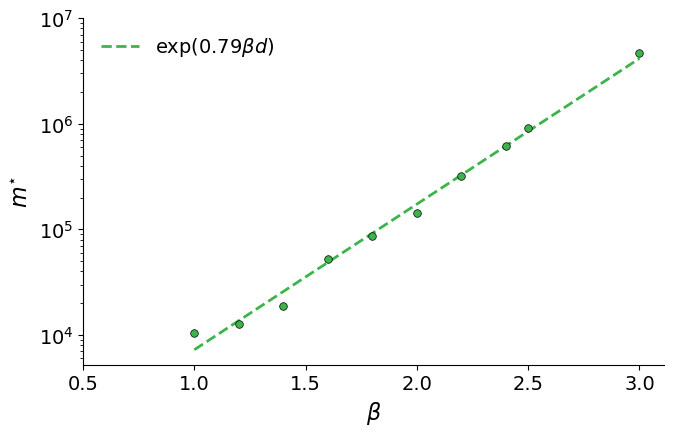

In [37]:
# M-Regime 
β_array = vcat([0.4+0.1*i for i=0:27],[3.5,4.0,4.5,5.0])
M_array = readdlm("FigE_M_Results.txt")

β_array_RPLE = vcat([1.0+0.2*i for i=0:7],[2.5,3.0])
M_array_RPLE = [10500,12800,18900,52700,87250,144400,321000,617550,916400,4678700]

yticks_array = 10.^(4:7)
xticks_array = 0.5:0.5:3.0

d_max = 4

x = solve_exp_system(β_array[7:end], M_array[7:end], d_max)
x_RPLE = solve_exp_system(β_array_RPLE, M_array_RPLE, d_max)

c1 = "#911eb4" #Purple
c2 = "#3cb44b" #Green

figure(figsize=(7.5,4.5))
ax=subplot(111)
ax[:spines]["top"][:set_color]("none") # Remove the top axis boundary
ax[:spines]["right"][:set_color]("none") # Remove the right axis boundary    


# Curve Fit
#semilogy(β_array[7:end],exp(x[1])*exp.(x[2]*β_array[7:end]*d_max),linestyle="--",c=c1,linewidth=2,label=latexstring("\$\\exp(",string(round(x[2],2)),"\\beta d)\$"),zorder=1)
semilogy(β_array_RPLE,exp(x_RPLE[1])*exp.(x_RPLE[2]*β_array_RPLE*d_max),linestyle="--",c=c2,linewidth=2,label=latexstring("\$\\exp(",string(round(x_RPLE[2],2)),"\\beta d)\$"),zorder=1)

# Data
scatter(β_array_RPLE,M_array_RPLE,s=30,color=c2,marker="o",edgecolor="k",linewidth=0.5, zorder=2)

xlabel(L"\beta",fontsize=16)
ylabel(L"m^{\star}",fontsize=16)
legend(fontsize=14, frameon=false, loc=2)
xticks(xticks_array,fontsize=14)
yticks(yticks_array, fontsize=14)
#grid("on",linestyle="dotted")

savefig("FigE_M_RPLE.svg", format="svg", dpi=300,bbox_inches="tight")

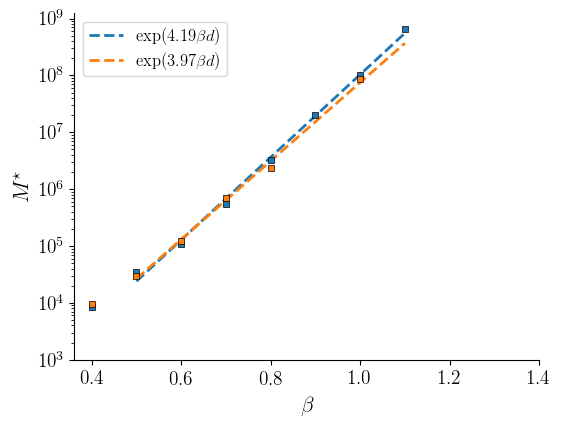

In [39]:
β_array1 = [0.4+0.1*i for i=0:7]
M_array1 = [8600,34300,106900,538400,3290400,20121600,101077550,655275350]

β_array2 = [0.4, 0.5, 0.6, 0.7, 0.8, 1.0]
M_array2 = [9550, 29950, 121700, 699700, 2356850, 87567900]

yticks_array = 10.^(3:9)
xticks_array = [0.4+0.2*i for i=0:5]

d_max = 4

x1 = solve_exp_system(β_array1[2:end],M_array1[2:end],d_max)
x2 = solve_exp_system(β_array2[2:end],M_array2[2:end],d_max)

figure(figsize=(6,4.5))
ax=subplot(111)
ax[:spines]["top"][:set_color]("none") # Remove the top axis boundary
ax[:spines]["right"][:set_color]("none") # Remove the right axis boundary
# Curve fit to data
semilogy(β_array1[2:end],exp(x1[1])*exp.(x1[2]*β_array1[2:end]*d_max),linestyle="--",c=tableau20_r[1],linewidth=2,label=L"\exp(4.19\beta d)",zorder=1)
semilogy(β_array1[2:end],exp(x2[1])*exp.(x2[2]*β_array1[2:end]*d_max),linestyle="--",c=tableau20_r[3],linewidth=2,label=L"\exp(3.97\beta d)",zorder=1)

# Data
scatter(β_array1,M_array1,s=20,c=tableau20_r[1],marker="s",edgecolor="k",linewidth=0.5, zorder=2)
scatter(β_array2,M_array2,s=20,c=tableau20_r[3],marker="s",edgecolor="k",linewidth=0.5, zorder=2)

#title("Ferromagnetic Lattice with Weak Impurty (T-regime)")
xlabel(L"\beta",fontsize=16)
ylabel(L"M^{\star}",fontsize=16)
legend(fontsize=12)
xticks(xticks_array,fontsize=14)
yticks(yticks_array,fontsize=14)
#grid("on")
savefig("FigE_T.eps", format="eps", dpi=300)

In [36]:
x1

2-element Array{Float64,1}:
 1.7114 
 4.18727

In [37]:
x2

2-element Array{Float64,1}:
 2.24228
 3.97391

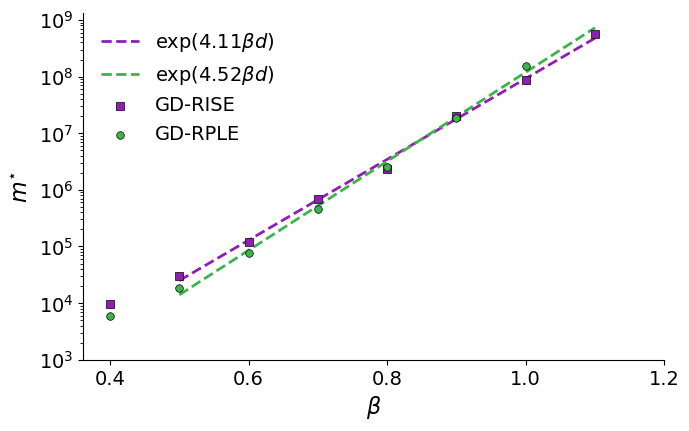

In [9]:
# T-Regime
#β_array1 = [0.4+0.1*i for i=0:7]
#M_array1 = [8600,34300,106900,538400,3290400,20121600,101077550,655275350]

β_array1 = [0.4+0.1*i for i=0:7]
M_array1 = [9550,29950,121700,699700,2356850,20063950,87567900,556339750]

# RPLE values
β_array2 = [0.4+0.1*i for i=0:6]
M_array2 = [6000,18700,75600,455900,2500700,18389850,156568200]

yticks_array = 10.^(3:9)
xticks_array = [0.4+0.2*i for i=0:4]

d_max = 4

x1 = solve_exp_system(β_array1[2:end],M_array1[2:end],d_max)
x2 = solve_exp_system(β_array2[2:end],M_array2[2:end],d_max)

figure(figsize=(7.5,4.5))
ax=subplot(111)
ax[:spines]["top"][:set_color]("none") # Remove the top axis boundary
ax[:spines]["right"][:set_color]("none") # Remove the right axis boundary
# Curve fit to data
semilogy(β_array1[2:end],exp(x1[1])*exp.(x1[2]*β_array1[2:end]*d_max),linestyle="--",c=c1,linewidth=2,label=latexstring("\$\\exp(",string(round(x1[2],2)),"\\beta d)\$"),zorder=1)
semilogy(β_array1[2:end],exp(x2[1])*exp.(x2[2]*β_array1[2:end]*d_max),linestyle="--",c=c2,linewidth=2,label=latexstring("\$\\exp(",string(round(x2[2],2)),"\\beta d)\$"),zorder=1)

# Data
scatter(β_array1,M_array1,s=30,color=c1,marker="s",edgecolor="k",linewidth=0.5, zorder=2, label="GD-RISE")
scatter(β_array2,M_array2,s=30,color=c2,marker="o",edgecolor="k",linewidth=0.5, zorder=2, label="GD-RPLE")

#title("Ferromagnetic Lattice with Weak Impurty (T-regime)")
xlabel(L"\beta",fontsize=16)
ylabel(L"m^{\star}",fontsize=16)
legend(fontsize=14,frameon=false,loc=2)
xticks(xticks_array,fontsize=14)
yticks(yticks_array,fontsize=14)
#grid("on")
savefig("FigE_T2.svg", format="svg", dpi=300, bbox_inches="tight")

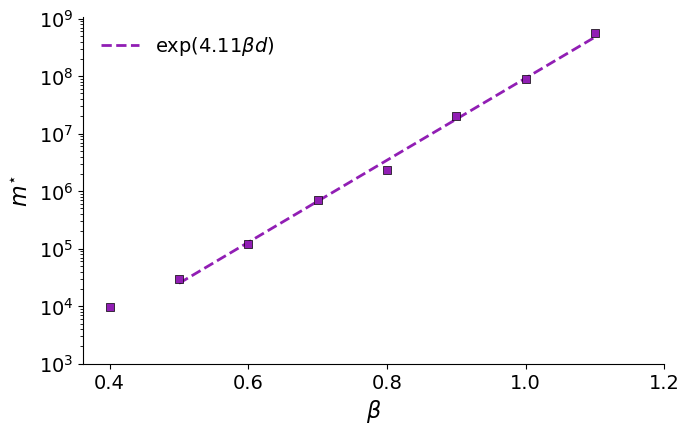

In [40]:
# T-Regime
#β_array1 = [0.4+0.1*i for i=0:7]
#M_array1 = [8600,34300,106900,538400,3290400,20121600,101077550,655275350]

β_array1 = [0.4+0.1*i for i=0:7]
M_array1 = [9550,29950,121700,699700,2356850,20063950,87567900,556339750]

# RPLE values
β_array2 = [0.4+0.1*i for i=0:6]
M_array2 = [6000,18700,75600,455900,2500700,18389850,156568200]

yticks_array = 10.^(3:9)
xticks_array = [0.4+0.2*i for i=0:4]

d_max = 4

x1 = solve_exp_system(β_array1[2:end],M_array1[2:end],d_max)
x2 = solve_exp_system(β_array2[2:end],M_array2[2:end],d_max)

figure(figsize=(7.5,4.5))
ax=subplot(111)
ax[:spines]["top"][:set_color]("none") # Remove the top axis boundary
ax[:spines]["right"][:set_color]("none") # Remove the right axis boundary
# Curve fit to data
semilogy(β_array1[2:end],exp(x1[1])*exp.(x1[2]*β_array1[2:end]*d_max),linestyle="--",c=c1,linewidth=2,label=latexstring("\$\\exp(",string(round(x1[2],2)),"\\beta d)\$"),zorder=1)

# Data
scatter(β_array1,M_array1,s=30,color=c1,marker="s",edgecolor="k",linewidth=0.5, zorder=2)

#title("Ferromagnetic Lattice with Weak Impurty (T-regime)")
xlabel(L"\beta",fontsize=16)
ylabel(L"m^{\star}",fontsize=16)
legend(fontsize=14,frameon=false,loc=2)
xticks(xticks_array,fontsize=14)
yticks(yticks_array,fontsize=14)
#grid("on")
savefig("FigE_T_RISE.svg", format="svg", dpi=300, bbox_inches="tight")

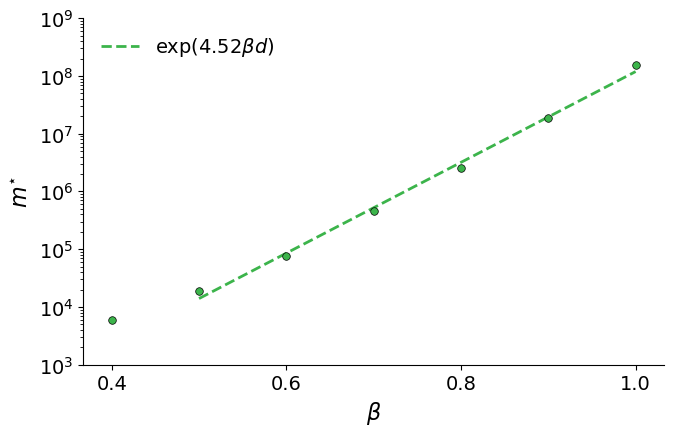

In [42]:
# T-Regime
#β_array1 = [0.4+0.1*i for i=0:7]
#M_array1 = [8600,34300,106900,538400,3290400,20121600,101077550,655275350]

β_array1 = [0.4+0.1*i for i=0:7]
M_array1 = [9550,29950,121700,699700,2356850,20063950,87567900,556339750]

# RPLE values
β_array2 = [0.4+0.1*i for i=0:6]
M_array2 = [6000,18700,75600,455900,2500700,18389850,156568200]

yticks_array = 10.^(3:9)
xticks_array = [0.4+0.2*i for i=0:3]

d_max = 4

x1 = solve_exp_system(β_array1[2:end],M_array1[2:end],d_max)
x2 = solve_exp_system(β_array2[2:end],M_array2[2:end],d_max)

figure(figsize=(7.5,4.5))
ax=subplot(111)
ax[:spines]["top"][:set_color]("none") # Remove the top axis boundary
ax[:spines]["right"][:set_color]("none") # Remove the right axis boundary
# Curve fit to data
semilogy(β_array2[2:end],exp(x2[1])*exp.(x2[2]*β_array2[2:end]*d_max),linestyle="--",c=c2,linewidth=2,label=latexstring("\$\\exp(",string(round(x2[2],2)),"\\beta d)\$"),zorder=1)

# Data
scatter(β_array2,M_array2,s=30,color=c2,marker="o",edgecolor="k",linewidth=0.5, zorder=2)

#title("Ferromagnetic Lattice with Weak Impurty (T-regime)")
xlabel(L"\beta",fontsize=16)
ylabel(L"m^{\star}",fontsize=16)
legend(fontsize=14,frameon=false,loc=2)
xticks(xticks_array,fontsize=14)
yticks(yticks_array,fontsize=14)
#grid("on")
savefig("FigE_T_RPLE.svg", format="svg", dpi=300, bbox_inches="tight")

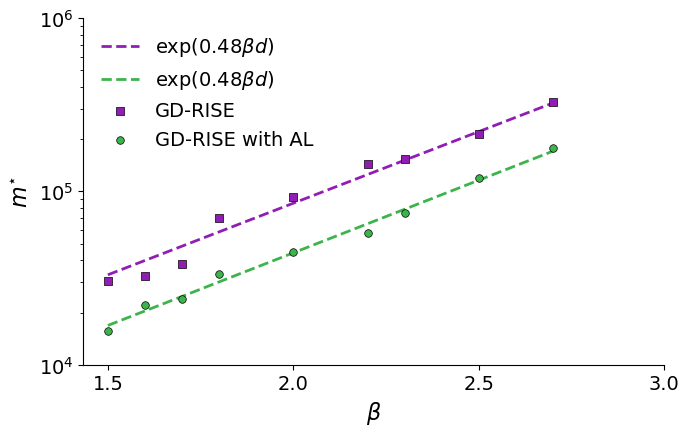

In [99]:
# M-Regime 
β_array = vcat([0.4+0.1*i for i=0:27],[3.5,4.0,4.5,5.0])
M_array = readdlm("FigE_M_Results.txt")

β_array_US = [1.5,1.6,1.7,1.8,2.0,2.2,2.3,2.5,2.7]
M_array_US = [15750,22050,24000,33350,45000,57500,75200,120000,178650]

idx_plot = Array{Int}(length(β_array_US))
for i=1:length(β_array_US)
    β_temp = β_array_US[i]
    #println(β_temp)
    idx_plot[i] = find(isequal(β_temp),round.(β_array,2))[1]
end

β_array_plot = β_array[idx_plot]
M_array_plot = M_array[idx_plot]

yticks_array = 10.^(4:6)
xticks_array = 1.5:0.5:3.0

d_max = 4

x = solve_exp_system(β_array[7:end], M_array[7:end], d_max)
x_US = solve_exp_system(β_array_US, M_array_US, d_max)

c1 = "#911eb4" #Purple
c2 = "#3cb44b" #Green

figure(figsize=(7.5,4.5))
ax=subplot(111)
ax[:spines]["top"][:set_color]("none") # Remove the top axis boundary
ax[:spines]["right"][:set_color]("none") # Remove the right axis boundary    


# Curve Fit
end_plot=idx_plot[end]
semilogy(β_array[12:end_plot],exp(x[1])*exp.(x[2]*β_array[12:end_plot]*d_max),linestyle="--",c=c1,linewidth=2,label=latexstring("\$\\exp(",string(round(x[2],2)),"\\beta d)\$"),zorder=1)
semilogy(β_array_US,exp(x_US[1])*exp.(x_US[2]*β_array_US*d_max),linestyle="--",c=c2,linewidth=2,label=latexstring("\$\\exp(",string(round(x_US[2],2)),"\\beta d)\$"),zorder=1)

# Data
scatter(β_array_plot,M_array_plot,s=30,color=c1,marker="s",edgecolor="k",linewidth=0.5, zorder=2, label="GD-RISE")
scatter(β_array_US,M_array_US,s=30,color=c2,marker="o",edgecolor="k",linewidth=0.5, zorder=2, label="GD-RISE with AL")

xlabel(L"\beta",fontsize=16)
ylabel(L"m^{\star}",fontsize=16)
legend(fontsize=14, frameon=false,loc=2)
xticks(xticks_array,fontsize=14)
yticks(yticks_array, fontsize=14)
#grid("on",linestyle="dotted")

savefig("FigE_M_GDRISE_AL_Results.png", format="png", dpi=300,bbox_inches="tight")

In [100]:
factor = M_array_US ./ M_array_plot

9-element Array{Float64,1}:
 0.514706
 0.675345
 0.625815
 0.477452
 0.481283
 0.400697
 0.489424
 0.559832
 0.541856

In [101]:
1-mean(factor)

0.47039893592221205

In [102]:
x_US

2-element Array{Float64,1}:
 6.83584 
 0.482705

In [62]:
exp(x_US[1])*exp(x_US[2]*2.3*d_max)

79409.52655001087

In [86]:
idx_plot = Array{Int}(length(β_array_US))
for i=1:length(β_array_US)
    β_temp = β_array_US[i]
    #println(β_temp)
    idx_plot[i] = find(isequal(β_temp),round.(β_array,2))[1]
end

1.5
1.6
1.7
2.0
2.2
2.5
2.7


In [85]:
i=1
β_temp = β_array_US[i]
idx_plot[i] = find(isequal(β_temp),round.(β_array,2))[1]

12

In [83]:
round(β_array,2)[12]

1.5

Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] round(::Array{Float64,1}, ::Int64, ::Int64) at ./deprecated.jl:57 (repeats 2 times)
 [3] include_string(::String, ::String) at ./loading.jl:522
 [4] execute_request(::ZMQ.Socket, ::IJulia.Msg) at /Users/gogol/.julia/v0.6/IJulia/src/execute_request.jl:180
 [5] (::Compat.#inner#14{Array{Any,1},IJulia.#execute_request,Tuple{ZMQ.Socket,IJulia.Msg}})() at /Users/gogol/.julia/v0.6/Compat/src/Compat.jl:332
 [6] eventloop(::ZMQ.Socket) at /Users/gogol/.julia/v0.6/IJulia/src/eventloop.jl:8
 [7] (::IJulia.##15#18)() at ./task.jl:335
while loading In[83], in expression starting on line 1


#### Plotting GMs

In [7]:
N = 16
d = 3
α = 0.4
β = 0.7

file_plot_gm = "FigA_gm.eps"
adj_matrix, struct_adj_matrix = ferro_lattice(N,α,β)
m = n = Int(sqrt(N))
draw_periodic_lattice(adj_matrix,m,n,α,β,file_plot_gm)

In [9]:
# Figure C
file_adj_matrix_gm = "adj_matrix_ferro_lattice_gm_C_T.txt"
adj_matrix = readdlm(file_adj_matrix_gm)
struct_adj_matrix = sign.(abs.(adj_matrix))
β = maximum(adj_matrix[:])

file_plot_gm = "FigC_gm.eps"
m = n = Int(sqrt(N))
draw_periodic_lattice(adj_matrix,m,n,α,β,file_plot_gm)

## Random Regular Graphs

### Figure B: Ferromagnetic model

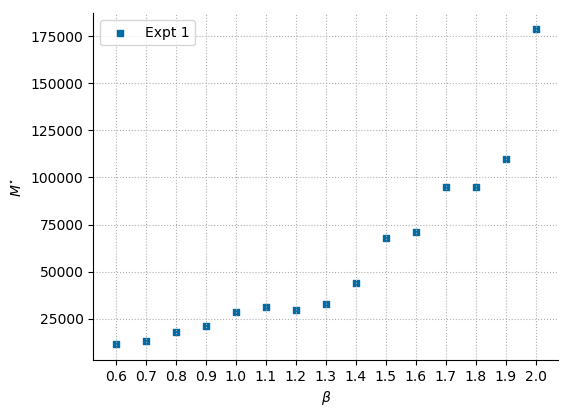

In [20]:
# M-Regime
β_array = 0.6:0.1:2.0
M_array1 = [11550,13300,17650,21350,28450,31300,29850,32850,43800,67650,71000,95050,95050,109950,178850]

d_max = 3

figure(figsize=(6,4.5))
ax=subplot(111)
ax[:spines]["top"][:set_color]("none") # Remove the top axis boundary
ax[:spines]["right"][:set_color]("none") # Remove the right axis boundary    
#semilogy(β_array,8500*log(6.5*β_array),"--k",linewidth=2,label="Curve Fit")
scatter(β_array,M_array1,s=20,c=tableau20blind_r[1],marker="s",label="Expt 1")
#title("Ferromagnetic Lattice (M-regime)")
xlabel(L"\beta")
ylabel(L"M^{\star}")
legend()
xticks(0.6:0.1:2.0)
grid("on",linestyle="dotted")
savefig("FigB_M.eps", format="eps", dpi=300,bbox_inches="tight")

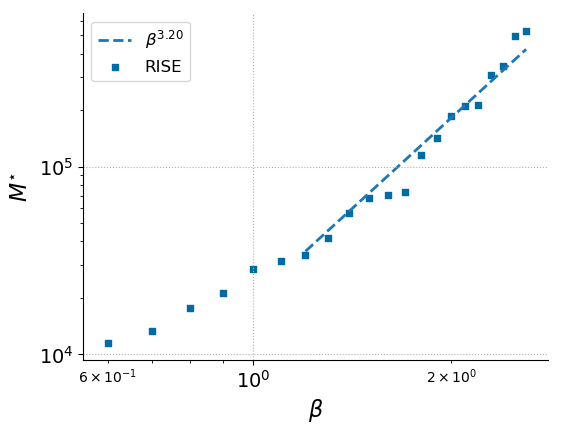

In [85]:
# M-Regime
β_array = [0.6 + 0.1*i for i=0:20]
M_array = readdlm("FigB_M_Results.txt")

xticks_array = 0.6:0.2:2.6

d_max = 3

x = solve_log_system(β_array[5:end],M_array[5:end],d_max)

figure(figsize=(6,4.5))
ax=subplot(111)
ax[:spines]["top"][:set_color]("none") # Remove the top axis boundary
ax[:spines]["right"][:set_color]("none") # Remove the right axis boundary    
#semilogy(β_array,8500*log(6.5*β_array),"--k",linewidth=2,label="Curve Fit")
#scatter(β_array,M_array,s=20,c=tableau20blind_r[1],marker="s",label="RISE")

# Curve Fit
#semilogy(β_array[2:end],exp(x[1])*exp.(x[2]*β_array[2:end]*d_max),linestyle="--",c=tableau20_r[1],linewidth=2,label=L"\exp(4.19\beta d)",zorder=1)
semilogy(β_array[7:end],exp(x[1])*(β_array[7:end].^(x[2])),linestyle="--",c=tableau20_r[1],linewidth=2,label=L"\beta^{3.20}",zorder=1)

# Data
scatter(β_array,M_array,s=20,c=tableau20blind_r[1],marker="s",label="RISE")

ax[:set_yscale]("log")
ax[:set_xscale]("log")

#title("Ferromagnetic Lattice with Weak Impurty (M-regime)")
xlabel(L"\beta",fontsize=16)
ylabel(L"M^{\star}",fontsize=16)
legend(fontsize=12)
#xticks(xticks_array,fontsize=14)
xticks(fontsize=14)
yticks(fontsize=14)
grid("on",linestyle="dotted")

savefig("FigB_ME.eps", format="eps", dpi=300,bbox_inches="tight")

In [71]:
x

2-element Array{Float64,1}:
 9.89076
 3.20387

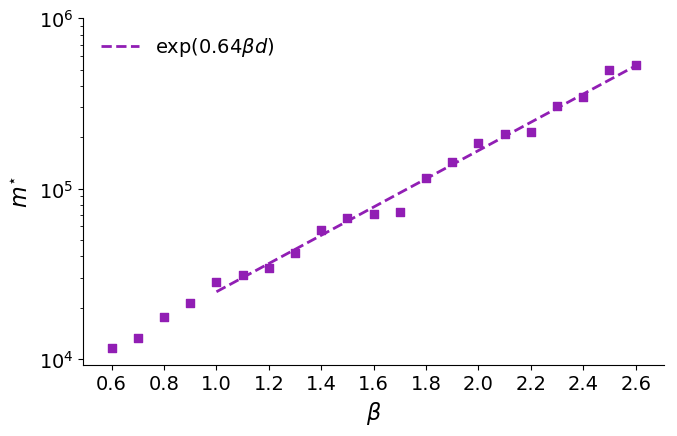

In [43]:
# M-Regime
β_array = [0.6 + 0.1*i for i=0:20]
M_array = readdlm("FigB_M_Results.txt")

yticks_array = 10.^(4:6)
xticks_array = 0.6:0.2:2.6

d_max = 3

x = solve_exp_system(β_array[5:end],M_array[5:end],d_max)

figure(figsize=(7.5,4.5))
ax=subplot(111)
ax[:spines]["top"][:set_color]("none") # Remove the top axis boundary
ax[:spines]["right"][:set_color]("none") # Remove the right axis boundary    


# Curve Fit
semilogy(β_array[5:end],exp(x[1])*exp.(x[2]*β_array[5:end]*d_max),linestyle="--",c=c1,linewidth=2,label=latexstring("\$\\exp(",string(round(x[2],2)),"\\beta d)\$"),zorder=1)

# Data
scatter(β_array,M_array,s=30,c=c1,marker="s")

#ax[:set_yscale]("log")
#ax[:set_xscale]("log")

#title("Ferromagnetic Lattice with Weak Impurty (M-regime)")
xlabel(L"\beta",fontsize=16)
ylabel(L"m^{\star}",fontsize=16)
legend(fontsize=14,frameon=false,loc=2)
xticks(xticks_array,fontsize=14)
yticks(yticks_array,fontsize=14)
#grid("on",linestyle="dotted")

savefig("FigB_ME2.svg", format="svg", dpi=300,bbox_inches="tight")

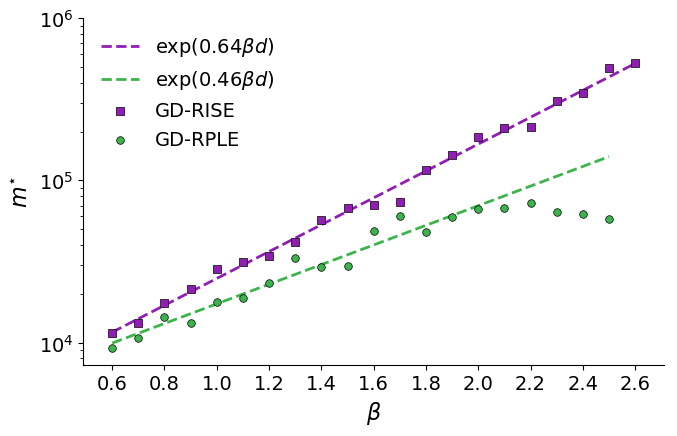

In [44]:
# M-regime comparison
β_array = [0.6 + 0.1*i for i=0:20]
M_array = readdlm("FigB_M_Results.txt")

β_array_RPLE = [0.6+0.1*i for i=0:19]
M_array_RPLE = [9300, 10750, 14350, 13250, 17850, 18950, 23300, 33100, 29150, 29600, 
    48800, 60250, 48200, 59550, 66850, 68100, 72950, 64300, 62450, 57800]

d_max = 3

ind_start_RISE = 1
ind_start_RPLE = 1

ind_end_RISE = 0
ind_end_RPLE = 4

yticks_array = 10.^(4:6)
xticks_array = 0.6:0.2:2.6

savefile_fig = "FigB_M_RISE_RPLE.svg"
format_fig = "svg"

FLAG_save = true

plot_trends_RISE_RPLE(β_array, M_array, β_array_RPLE, M_array_RPLE, d_max, 
        ind_start_RISE, ind_start_RPLE, ind_end_RISE, ind_end_RPLE,
        xticks_array, yticks_array, savefile_fig, format_fig, FLAG_save)

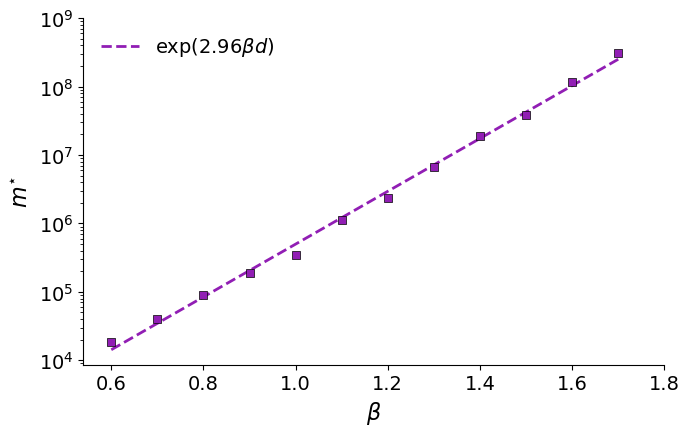

In [45]:
# T-Regime
#β_array1 = [0.6+0.1*i for i=0:13]
#M_array1 = [18500,38850,99000,240600,505250,1169750,2339500,6583650,16004800,45040550,132970850,307860650,712774300,2106184350]

β_array2 = [0.6+0.1*i for i=0:11]
M_array2 = [18500,39900,90700,187300,351250,1126400,2329650,6779900,18792650,38871200,118790700,313596350]

yticks_array = 10.^(4:9)
xticks_array = [0.6+0.2*i for i=0:6]
d_max = 3

#x1 = solve_exp_system(β_array1,M_array1,d_max)
x2 = solve_exp_system(β_array2,M_array2,d_max)

figure(figsize=(7.5,4.5))
#rc("text", usetex=true)
#rc("font", family="sans-serif")
ax=subplot(111)
ax[:spines]["top"][:set_color]("none") # Remove the top axis boundary
ax[:spines]["right"][:set_color]("none") # Remove the right axis boundary

# Curve fit to data
#semilogy(β_array1,exp(x1[1])*exp.(x1[2]*β_array1*d_max),linestyle="--",c=tableau20_r[1],linewidth=2,label=L"\exp(2.98\beta d)",zorder=1)
semilogy(β_array2,exp(x2[1])*exp.(x2[2]*β_array2*d_max),linestyle="--",c=c1,linewidth=2,label=latexstring("\$\\exp(",string(round(x2[2],2)),"\\beta d)\$"),zorder=1)

# Data
#scatter(β_array1,M_array1,s=20,c=tableau20_r[1],marker="s",edgecolor="k",linewidth=0.5, zorder=2)
scatter(β_array2,M_array2,s=30,color=c1,marker="s",edgecolor="k",linewidth=0.5,zorder=2)

#title("Ferromagnetic Lattice (T-regime)")
xlabel(L"\beta",fontsize=16)
ylabel(L"m^{\star}",fontsize=16)
legend(fontsize=14,frameon=false)
xticks(xticks_array,fontsize=14)
yticks(yticks_array,fontsize=14)
#grid("on")
savefig("FigB_T2.svg", format="svg", dpi=300,bbox_inches="tight")

In [46]:
x1

2-element Array{Float64,1}:
 1.91185
 4.10733

In [47]:
x2

2-element Array{Float64,1}:
 4.23371
 2.96248

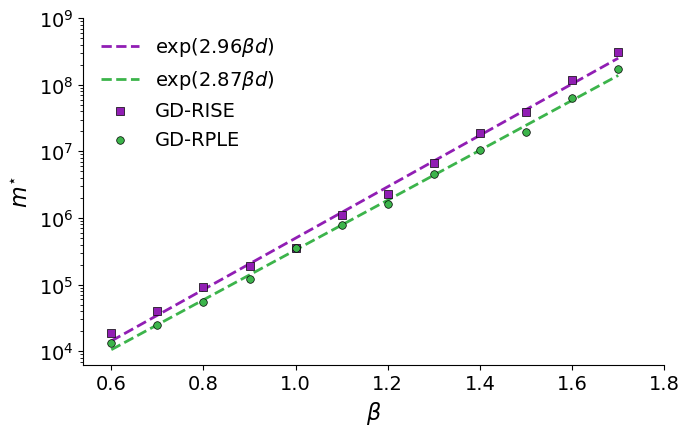

In [53]:
# T-regime comparison
β_array = [0.6+0.1*i for i=0:11]
M_array = [18500,39900,90700,187300,351250,1126400,2329650,6779900,18792650,38871200,118790700,313596350]

β_array_RPLE = [0.6+0.1*i for i=0:11]
M_array_RPLE = [13450, 24500, 54100, 119900, 356650, 792650, 1598300, 4535050, 10587150, 19366200,
    63173100, 170731450]

d_max = 3

ind_start_RISE = 1
ind_start_RPLE = 1

ind_end_RISE = 0
ind_end_RPLE = 0

yticks_array = 10.^(4:9)
xticks_array = [0.6+0.2*i for i=0:6]

savefile_fig = "FigB_T_RISE_RPLE.svg"
format_fig = "svg"

FLAG_save = true

plot_trends_RISE_RPLE(β_array, M_array, β_array_RPLE, M_array_RPLE, d_max, 
        ind_start_RISE, ind_start_RPLE, ind_end_RISE, ind_end_RPLE,
        xticks_array, yticks_array, savefile_fig, format_fig, FLAG_save)

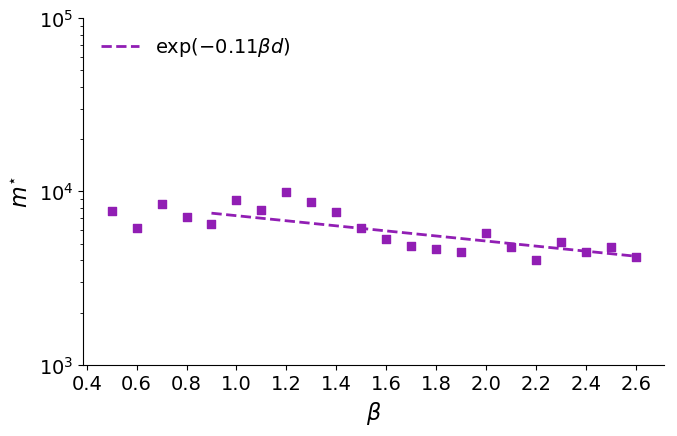

In [56]:
# M-regime with corrected regularization
β_array = [0.5 + i*0.1 for i=0:21]
M_array = [7700, 6160, 8500, 7100, 6500, 8950, 7850, 9900, 8700, 7650, 6120, 5350, 4850, 4650, 
    4450, 5750, 4800, 4000, 5100, 4450, 4800, 4200]

yticks_array = 10.^(3:5)
xticks_array = 0.4:0.2:2.6

d_max = 3

x = solve_exp_system(β_array,M_array,d_max)

figure(figsize=(7.5,4.5))
ax=subplot(111)
ax[:spines]["top"][:set_color]("none") # Remove the top axis boundary
ax[:spines]["right"][:set_color]("none") # Remove the right axis boundary    


# Curve Fit
semilogy(β_array[5:end],exp(x[1])*exp.(x[2]*β_array[5:end]*d_max),linestyle="--",c=c1,linewidth=2,label=latexstring("\$\\exp(",string(round(x[2],2)),"\\beta d)\$"),zorder=1)

# Data
scatter(β_array,M_array,s=30,c=c1,marker="s")

#ax[:set_yscale]("log")
#ax[:set_xscale]("log")

#title("Ferromagnetic Lattice with Weak Impurty (M-regime)")
xlabel(L"\beta",fontsize=16)
ylabel(L"m^{\star}",fontsize=16)
legend(fontsize=14,frameon=false,loc=2)
xticks(xticks_array,fontsize=14)
yticks(yticks_array,fontsize=14)
#grid("on",linestyle="dotted")

savefig("FigB_M_RPLE_Regularization.png", format="png", dpi=300,bbox_inches="tight")

### Figure D: Spin Glass Model

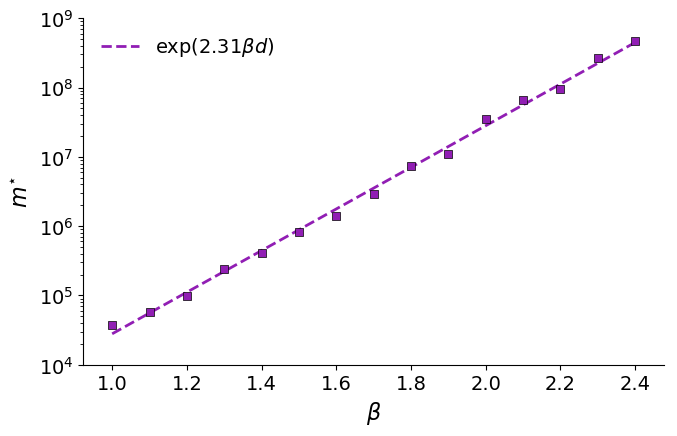

In [48]:
#β_array1 = [1.0+0.1*i for i=0:14]
#M_array1 = [37950,82200,154000,261800,490650,1064400,2199300,3925750,7357800,15963900,28495550,60775300,108483900,213492150,591185250]

β_array2 = [1.0+0.1*i for i=0:14]
M_array2 = [37950,58500,99400,237750,404450,836350,1423100,2943350,7399950,10877900,34904750,65485800,96264100,266834450,476778050]

yticks_array = 10.^(4:9)
xticks_array = 1.0:0.2:2.4
d_max = 3

#x1 = solve_exp_system(β_array1,M_array1,d_max)
x2 = solve_exp_system(β_array2,M_array2,d_max)

figure(figsize=(7.5,4.5))
#rc("text", usetex=true)
#rc("font", family="sans-serif")
ax=subplot(111)
ax[:spines]["top"][:set_color]("none") # Remove the top axis boundary
ax[:spines]["right"][:set_color]("none") # Remove the right axis boundary

# Curve fit to data
#semilogy(β_array1,exp(x1[1])*exp.(x1[2]*β_array1*d_max),linestyle="--",c=tableau20_r[1],linewidth=2,label=L"\exp(2.23\beta d)",zorder=1)
semilogy(β_array2,exp(x2[1])*exp.(x2[2]*β_array2*d_max),linestyle="--",c=c1,linewidth=2,label=latexstring("\$\\exp(",string(round(x2[2],2)),"\\beta d)\$"),zorder=1)

# Data
#scatter(β_array1,M_array1,s=20,c=tableau20_r[1],marker="s",edgecolor="k",linewidth=0.5, zorder=2)
scatter(β_array2,M_array2,s=30,color=c1,marker="s",edgecolor="k",linewidth=0.5, zorder=2)

#title("Spin Glass Model (T-regime)")
xlabel(L"\beta",fontsize=16)
ylabel(L"m^{\star}",fontsize=16)
legend(fontsize=14,frameon=false,loc=2)
xticks(xticks_array,fontsize=14)
yticks(yticks_array,fontsize=14)
#grid("on")
savefig("FigD_T.svg", format="svg", dpi=300,bbox_inches="tight")

In [49]:
x1

2-element Array{Float64,1}:
 1.91185
 4.10733

In [50]:
x2

2-element Array{Float64,1}:
 3.32203
 2.30508

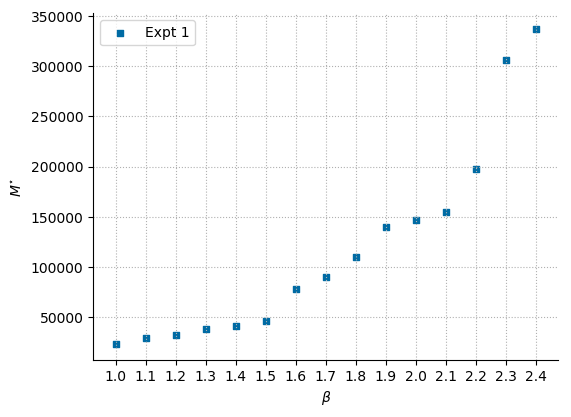

In [22]:
β_array = [1.0+0.1*i for i=0:14]
M_array1 = [23500,29850,32850,37950,41750,45950,78250,90550,109950,140200,147200,154550,197100,305600,336850]

d_max = 3

figure(figsize=(6,4.5))
ax=subplot(111)
ax[:spines]["top"][:set_color]("none") # Remove the top axis boundary
ax[:spines]["right"][:set_color]("none") # Remove the right axis boundary    
#semilogy(β_array,8500*log(6.5*β_array),"--k",linewidth=2,label="Curve Fit")
scatter(β_array,M_array1,s=20,c=tableau20blind_r[1],marker="s",label="Expt 1")
#title("Spin Glass Model (M-regime)")
xlabel(L"\beta")
ylabel(L"M^{\star}")
legend()
xticks(β_array)
grid("on",linestyle="dotted")
savefig("FigD_M.eps", format="eps", dpi=300,bbox_inches="tight")

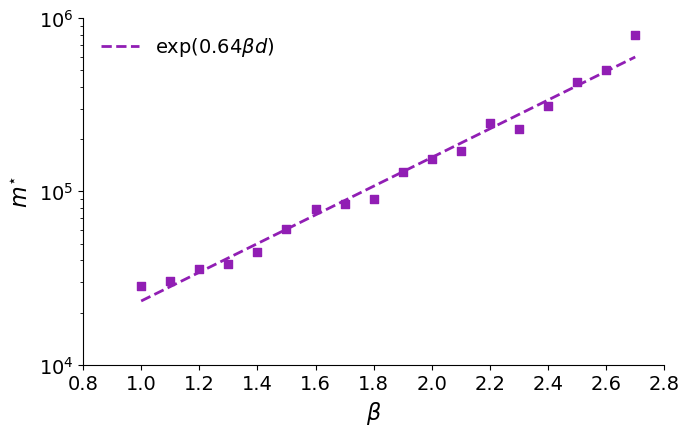

In [51]:
# M-Regime 
β_array = [1.0+0.1*i for i=0:17]
M_array = readdlm("FigD_M_Results.txt")

yticks_array = 10.^(4:6)
xticks_array = 0.8:0.2:2.8

d_max = 3

x = solve_exp_system(β_array,M_array,d_max)

figure(figsize=(7.5,4.5))
ax=subplot(111)
ax[:spines]["top"][:set_color]("none") # Remove the top axis boundary
ax[:spines]["right"][:set_color]("none") # Remove the right axis boundary    


# Curve Fit
semilogy(β_array,exp(x[1])*exp.(x[2]*β_array*d_max),linestyle="--",c=c1,linewidth=2,label=latexstring("\$\\exp(",string(round(x[2],2)),"\\beta d)\$"),zorder=1)

# Data
scatter(β_array,M_array,s=30,c=c1,marker="s")

#ax[:set_yscale]("log")
#ax[:set_xscale]("log")

#title("Ferromagnetic Lattice with Weak Impurty (M-regime)")
xlabel(L"\beta",fontsize=16)
ylabel(L"m^{\star}",fontsize=16)
legend(fontsize=14,frameon=false,loc=2)
xticks(xticks_array,fontsize=14)
yticks(yticks_array,fontsize=14)
#grid("on",linestyle="dotted")

savefig("FigD_ME2.svg", format="svg", dpi=300,bbox_inches="tight")

In [52]:
x

2×1 Array{Float64,2}:
 8.1496  
 0.635912

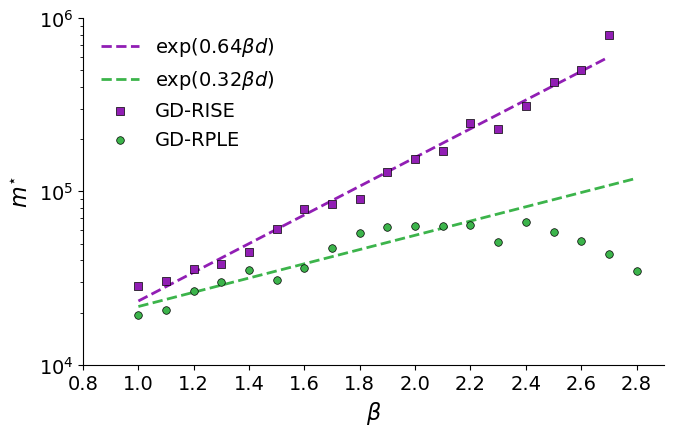

In [50]:
# M-Regime 
β_array = [1.0+0.1*i for i=0:17]
M_array = readdlm("FigD_M_Results.txt")

β_array_RPLE = [1.0+0.1*i for i=0:18]
M_array_RPLE = [19400, 20600, 26750, 29900, 35150, 30950, 36250, 46900, 57950, 62000, 63200, 63000, 64200,
    51360, 66600, 58650, 51700, 43400, 34720]

d_max = 3

ind_start_RISE = 1
ind_start_RPLE = 1

ind_end_RISE = 0
ind_end_RPLE = 5

yticks_array = 10.^(4:6)
xticks_array = 0.8:0.2:2.8

savefile_fig = "FigD_M_RISE_RPLE.svg"
format_fig = "svg"

FLAG_save = true

plot_trends_RISE_RPLE(β_array, M_array, β_array_RPLE, M_array_RPLE, d_max, 
        ind_start_RISE, ind_start_RPLE, ind_end_RISE, ind_end_RPLE,
        xticks_array, yticks_array, savefile_fig, format_fig, FLAG_save)

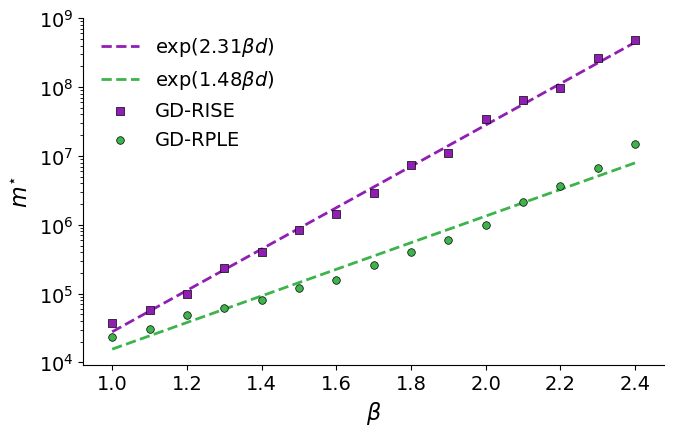

In [48]:
# T-regime comparison
β_array = [1.0+0.1*i for i=0:14]
M_array = [37950,58500,99400,237750,404450,836350,1423100,2943350,7399950,10877900,34904750,65485800,96264100,266834450,476778050]

β_array_RPLE = [1.0+0.1*i for i=0:14]
M_array_RPLE = [23500, 30550, 48150, 62595, 81373, 122400, 159120, 263900, 397100, 597550, 977100, 2172200, 
    3603950, 6592250, 14657150]

d_max = 3

ind_start_RISE = 1
ind_start_RPLE = 1

ind_end_RISE = 0
ind_end_RPLE = 0

yticks_array = 10.^(4:9)
xticks_array = 1.0:0.2:2.4

savefile_fig = "FigD_T_RISE_RPLE.svg"
format_fig = "svg"

FLAG_save = true

plot_trends_RISE_RPLE(β_array, M_array, β_array_RPLE, M_array_RPLE, d_max, 
        ind_start_RISE, ind_start_RPLE, ind_end_RISE, ind_end_RPLE,
        xticks_array, yticks_array, savefile_fig, format_fig, FLAG_save)

### Figure F: Ferromagnetic model with weak antiferromagnetic impurity

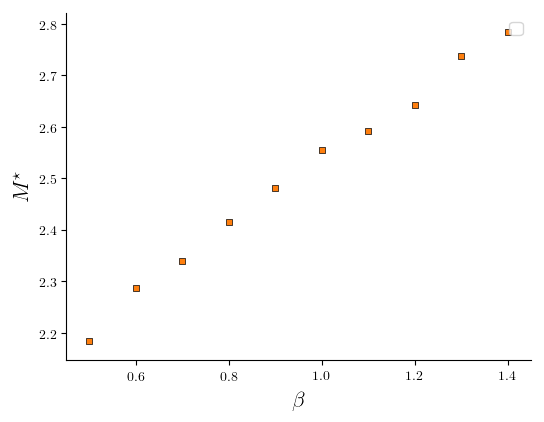

PyObject <matplotlib.legend.Legend object at 0x13cb884d0>

In [41]:
β_array2 = [0.5+0.1*i for i=0:9]
M_array2 = [7250,18750,31800,72200,156550,393200,637200,1255050,5138900,10629300]

yticks_array = 10.^(3:9)
xticks_array = 0.4:0.2:1.4
d_max = 3

x2 = solve_exp_system(β_array2,M_array2,d_max)

figure(figsize=(6,4.5))
rc("text", usetex=true)
rc("font", family="sans-serif")
ax=subplot(111)
ax[:spines]["top"][:set_color]("none") # Remove the top axis boundary
ax[:spines]["right"][:set_color]("none") # Remove the right axis boundary

# Data
scatter(β_array2,log.(log.(M_array2)),s=20,c=tableau20_r[3],marker="s",edgecolor="k",linewidth=0.5, zorder=2)

#title("Spin Glass Model (T-regime)")
xlabel(L"\beta",fontsize=16)
ylabel(L"M^{\star}",fontsize=16)
legend(fontsize=12)
#xticks(xticks_array,fontsize=14)
#yticks(yticks_array,fontsize=14)
#grid("on")
#savefig("FigF_T.eps", format="eps", dpi=300,bbox_inches="tight")

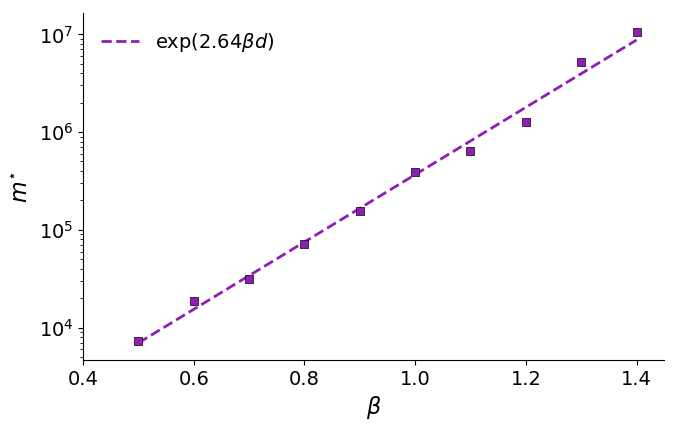

In [53]:
β_array1 = [0.5+0.1*i for i=0:9]
M_array1 = [9100,17850,33400,79650,164500,293600,812750,1851450,3470000,12876350]

β_array2 = [0.5+0.1*i for i=0:9]
M_array2 = [7250,18750,31800,72200,156550,393200,637200,1255050,5138900,10629300]

yticks_array = 10.^(4:7)
xticks_array = 0.4:0.2:1.4
d_max = 3

#x1 = solve_exp_system(β_array1,M_array1,d_max)
x2 = solve_exp_system(β_array2,M_array2,d_max)

figure(figsize=(7.5,4.5))
#rc("text", usetex=true)
#rc("font", family="sans-serif")
ax=subplot(111)
ax[:spines]["top"][:set_color]("none") # Remove the top axis boundary
ax[:spines]["right"][:set_color]("none") # Remove the right axis boundary

# Curve fit to data
#semilogy(β_array1,exp(x1[1])*exp.(x1[2]*β_array1*d_max),linestyle="--",c=tableau20_r[1],linewidth=2,label=L"\exp(2.62\beta d)",zorder=1)
semilogy(β_array2,exp(x2[1])*exp.(x2[2]*β_array2*d_max),linestyle="--",c=c1,linewidth=2,label=L"\exp(2.64\beta d)",zorder=1)

# Data
#scatter(β_array1,M_array1,s=20,c=tableau20_r[1],marker="s",edgecolor="k",linewidth=0.5, zorder=2)
scatter(β_array2,M_array2,s=30,c=c1,marker="s",edgecolor="k",linewidth=0.5, zorder=2)

#title("Spin Glass Model (T-regime)")
xlabel(L"\beta",fontsize=16)
ylabel(L"m^{\star}",fontsize=16)
legend(fontsize=14,frameon=false,loc=2)
xticks(xticks_array,fontsize=14)
yticks(yticks_array,fontsize=14)
#grid("on")
savefig("FigF_T.svg", format="svg", dpi=300,bbox_inches="tight")

In [54]:
x1

2-element Array{Float64,1}:
 1.91185
 4.10733

In [55]:
x2

2-element Array{Float64,1}:
 4.88908
 2.64118

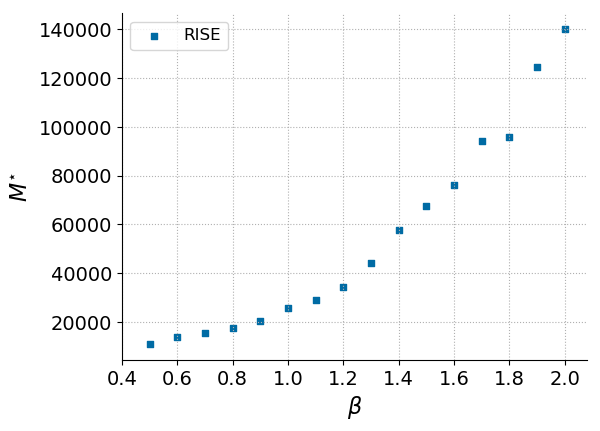

/Users/gogol/.julia/v0.6/Conda/deps/usr/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


In [7]:
β_array = [0.5+0.1*i for i=0:15]
M_array = [11000,14050,15600,17400,20350,25550,29200,34250,44250,57550,67750,76050,94100,95950,124650,140150]
#yticks_array = 10.^(3:9)
xticks_array = 0.4:0.2:2.0
d_max = 3

d_max = 3

figure(figsize=(6,4.5))
ax=subplot(111)
ax[:spines]["top"][:set_color]("none") # Remove the top axis boundary
ax[:spines]["right"][:set_color]("none") # Remove the right axis boundary    
#semilogy(β_array,8500*log(6.5*β_array),"--k",linewidth=2,label="Curve Fit")
scatter(β_array,M_array,s=20,c=tableau20blind_r[1],marker="s",label="RISE")
#title("Spin Glass Model (M-regime)")
xlabel(L"\beta",fontsize=16)
ylabel(L"M^{\star}",fontsize=16)
legend(fontsize=12)
xticks(xticks_array,fontsize=14)
yticks(fontsize=14)
grid("on",linestyle="dotted")
savefig("FigF_M.eps", format="eps", dpi=300,bbox_inches="tight")

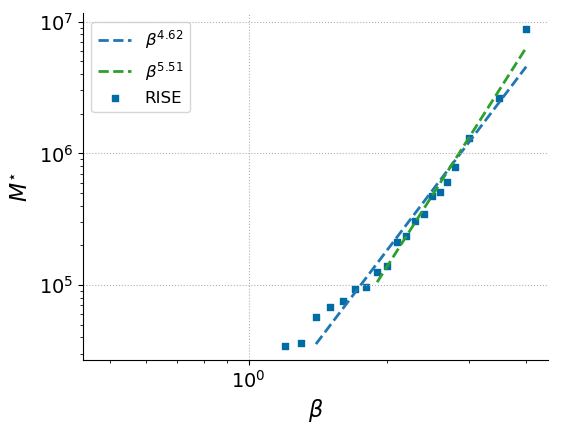

In [12]:
# M-Regime 
β_array = vcat([0.5+0.1*i for i=0:23],[3.0,3.5,4.0])
M_array = readdlm("FigF_M_Results.txt")

xticks_array = 0.5:0.5:4.0

d_max = 3

#x = solve_exp_system(β_array[2:end],M_array[2:end],d_max)
x1 = solve_log_system(β_array[10:end],M_array[10:end],d_max)
x2 = solve_log_system(β_array[15:end],M_array[15:end],d_max)

figure(figsize=(6,4.5))
ax=subplot(111)
ax[:spines]["top"][:set_color]("none") # Remove the top axis boundary
ax[:spines]["right"][:set_color]("none") # Remove the right axis boundary    

# Curve Fit
PyPlot.plot(β_array[10:end],exp(x1[1])*(β_array[10:end].^(x1[2])),linestyle="--",c=tableau20_r[1],linewidth=2,label=latexstring("\$\\beta^{",string(round(x1[2],2)),"}\$"),zorder=1)
PyPlot.plot(β_array[15:end],exp(x2[1])*(β_array[15:end].^(x2[2])),linestyle="--",c=tableau20_r[5],linewidth=2,label=latexstring("\$\\beta^{",string(round(x2[2],2)),"}\$"),zorder=1)

# Data
scatter(β_array,M_array,s=20,c=tableau20blind_r[1],marker="s",label="RISE")

ax[:set_yscale]("log")
ax[:set_xscale]("log")

#title("Ferromagnetic Lattice with Weak Impurty (M-regime)")
xlabel(L"\beta",fontsize=16)
ylabel(L"M^{\star}",fontsize=16)
legend(fontsize=12)
#xticks(xticks_array,fontsize=14)
yticks(fontsize=14)
xticks(fontsize=14)
grid("on",linestyle="dotted")

#savefig("FigF_ME.eps", format="eps", dpi=300,bbox_inches="tight")

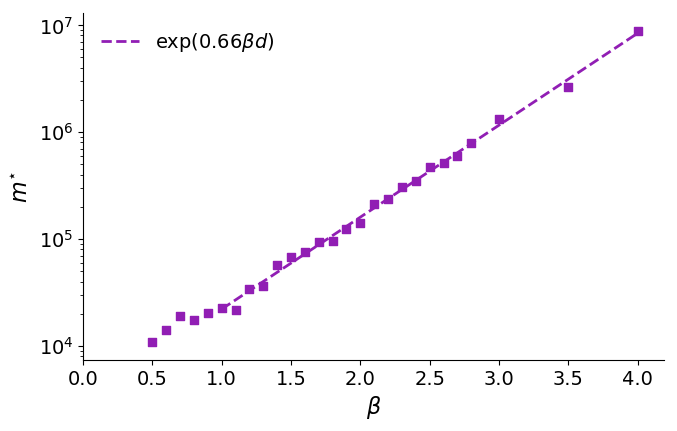

In [56]:
# M-Regime 
β_array = vcat([0.5+0.1*i for i=0:23],[3.0,3.5,4.0])
M_array = readdlm("FigF_M_Results.txt")

xticks_array = 0.0:0.5:4.0

d_max = 3

x = solve_exp_system(β_array[6:end],M_array[6:end],d_max)

figure(figsize=(7.5,4.5))
ax=subplot(111)
ax[:spines]["top"][:set_color]("none") # Remove the top axis boundary
ax[:spines]["right"][:set_color]("none") # Remove the right axis boundary    


# Curve Fit
semilogy(β_array[6:end],exp(x[1])*exp.(x[2]*β_array[6:end]*d_max),linestyle="--",c=c1,linewidth=2,label=latexstring("\$\\exp(",string(round(x[2],2)),"\\beta d)\$"),zorder=1)

# Data
scatter(β_array,M_array,s=30,c=c1,marker="s")

#ax[:set_yscale]("log")
#ax[:set_xscale]("log")

#title("Ferromagnetic Lattice with Weak Impurty (M-regime)")
xlabel(L"\beta",fontsize=16)
ylabel(L"m^{\star}",fontsize=16)
legend(fontsize=14,frameon=false,loc=2)
xticks(xticks_array,fontsize=14)
yticks(fontsize=14)
#grid("on",linestyle="dotted")

savefig("FigF_ME2.svg", format="svg", dpi=300,bbox_inches="tight")

In [57]:
x

2-element Array{Float64,1}:
 8.02522 
 0.659824

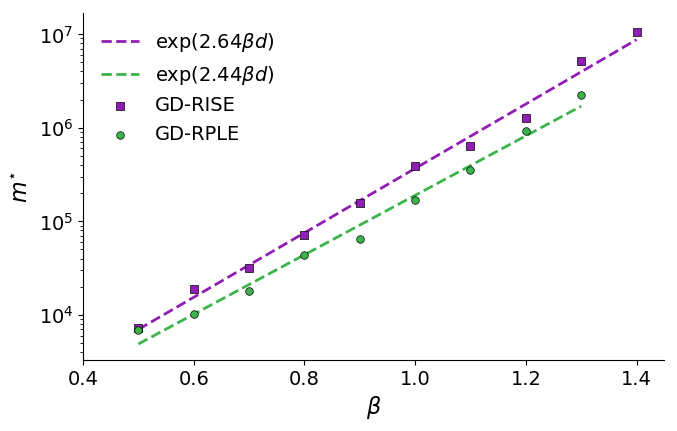

In [55]:
# T-regime comparison
β_array = [0.5+0.1*i for i=0:9]
M_array = [7250,18750,31800,72200,156550,393200,637200,1255050,5138900,10629300]

β_array_RPLE = [0.5+0.1*i for i=0:9]
M_array_RPLE = [6900, 10300, 17850, 43350, 65200, 167350, 354050, 910800, 2232300, 9358250]

d_max = 3

ind_start_RISE = 1
ind_start_RPLE = 1

ind_end_RISE = 0
ind_end_RPLE = 0

yticks_array = 10.^(4:7)
xticks_array = 0.4:0.2:1.4

savefile_fig = "FigF_T_RISE_RPLE.svg"
format_fig = "svg"

FLAG_save = true

plot_trends_RISE_RPLE(β_array, M_array, β_array_RPLE, M_array_RPLE, d_max, 
        ind_start_RISE, ind_start_RPLE, ind_end_RISE, ind_end_RPLE,
        xticks_array, yticks_array, savefile_fig, format_fig, FLAG_save)

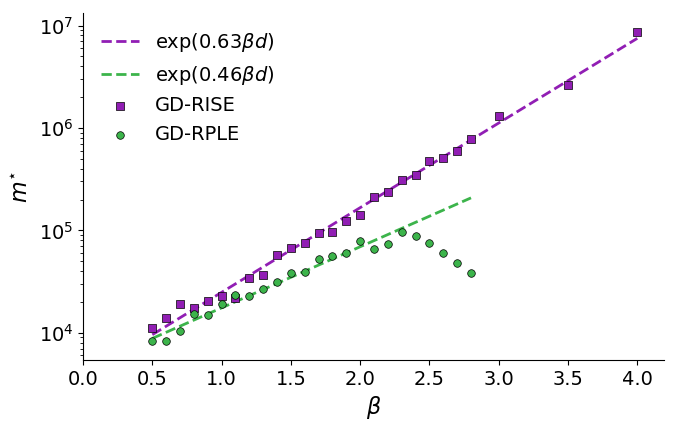

In [52]:
# M-regime comparison
β_array = vcat([0.5+0.1*i for i=0:23],[3.0,3.5,4.0])
M_array = readdlm("FigF_M_Results.txt")

β_array_RPLE = [0.5+0.1*i for i=0:23]
M_array_RPLE = [8250, 8250, 10400, 15300, 14800, 19050, 23450, 22650, 26500, 31100, 38200, 
    38900, 52800, 56450, 60350, 78300, 65750, 73750, 95800, 88650, 74450, 59560, 47648, 38118]

d_max = 3

ind_start_RISE = 1
ind_start_RPLE = 1

ind_end_RISE = 0
ind_end_RPLE = 6

yticks_array = 10.^(4:7)
xticks_array = 0.0:0.5:4.0

savefile_fig = "FigF_M_RISE_RPLE.svg"
format_fig = "svg"

FLAG_save = true

plot_trends_RISE_RPLE(β_array, M_array, β_array_RPLE, M_array_RPLE, d_max, 
        ind_start_RISE, ind_start_RPLE, ind_end_RISE, ind_end_RPLE,
        xticks_array, yticks_array, savefile_fig, format_fig, FLAG_save)

#### Plots of Graphical Models

In [26]:
N = 16
d = 3
α = 0.4

# Figure D
file_adj_matrix_gm = "spin_glass_random_regular_adj_matrix.txt"
file_plot_gm = "FigD_gm.eps"

adj_matrix = readdlm(file_adj_matrix_gm)
struct_adj_matrix = sign.(abs.(adj_matrix))
β = maximum(adj_matrix[:])

gm = Junet.Graph(struct_adj_matrix,directed=false)

layout_FigD = layout_fruchterman_reingold(gm)

h = Junet.plot(gm, size=(300,300), layout=layout_FigD, node_color="white", node_border_color="black",
    node_border_width=2, edge_color=[edge_color_gm(i, adj_matrix, α, β) for i = 1:edgecount(gm)],
    edge_width=3, format=:eps, file=file_plot_gm)

In [27]:
# Figure B
FLAG_weak_impurity = false
file_adj_matrix_gm = "spin_glass_random_regular_adj_matrix.txt"
file_plot_gm = "FigB_gm.eps"

adj_matrix = readdlm(file_adj_matrix_gm)
struct_adj_matrix = sign.(abs.(adj_matrix))
β = maximum(adj_matrix[:])

U_temp_adj_matrix = triu(struct_adj_matrix)

# adj_matrix is a sparse matrix
R, C, V = findnz(U_temp_adj_matrix)
V = β*V

# one random index to change to -α
ind_α = 8
if FLAG_weak_impurity
    V[ind_α] = -α
else
    V[ind_α] = α
end

U_adj_matrix = sparse(R, C, V, N, N)
adj_matrix = U_adj_matrix + U_adj_matrix'
adj_matrix = Array(adj_matrix)

gm = Junet.Graph(struct_adj_matrix,directed=false)

h = Junet.plot(gm, size=(300,300), layout=layout_FigD, node_color="white", node_border_color="black",
    node_border_width=2, edge_color=[edge_color_gm(i, adj_matrix, α, β) for i = 1:edgecount(gm)],
    edge_width=3, format=:eps, file=file_plot_gm)

In [28]:
# Figure F
FLAG_weak_impurity = true
file_adj_matrix_gm = "spin_glass_random_regular_adj_matrix.txt"
file_plot_gm = "FigF_gm.eps"

adj_matrix = readdlm(file_adj_matrix_gm)
struct_adj_matrix = sign.(abs.(adj_matrix))
β = maximum(adj_matrix[:])

U_temp_adj_matrix = triu(struct_adj_matrix)

# adj_matrix is a sparse matrix
R, C, V = findnz(U_temp_adj_matrix)
V = β*V

# one random index to change to -α
ind_α = 8
if FLAG_weak_impurity
    V[ind_α] = -α
else
    V[ind_α] = α
end

U_adj_matrix = sparse(R, C, V, N, N)
adj_matrix = U_adj_matrix + U_adj_matrix'
adj_matrix = Array(adj_matrix)

gm = Junet.Graph(struct_adj_matrix,directed=false)

h = Junet.plot(gm, size=(300,300), layout=layout_FigD, node_color="white", node_border_color="black",
    node_border_width=2, edge_color=[edge_color_gm(i, adj_matrix, α, β) for i = 1:edgecount(gm)],
    edge_width=3, format=:eps, file=file_plot_gm)